In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
df = pd.read_excel('credit-card_customers.xlsx')
df

,Customer_Number,Attrition_Flag,Age,Date_of_birth,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3708092208,Existing Customer,45,1979-06-09,F,3,High School,Married,Less than $40K,Blue,...,3,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469
1,3708093408,Attrited Customer,58,1966-05-28,M,0,Unknown,Single,$40K - $60K,Blue,...,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
2,3708094683,Attrited Customer,46,1978-06-29,M,3,Doctorate,Divorced,$80K - $120K,Blue,...,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214
3,3708095583,Existing Customer,34,1990-06-23,F,2,Uneducated,Single,Less than $40K,Blue,...,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,3708097083,Existing Customer,49,1975-03-12,F,2,Uneducated,Married,Unknown,Blue,...,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12121,3828298458,Existing Customer,50,1974-03-29,M,0,Uneducated,Married,$60K - $80K,Blue,...,1,3,3640.0,659,2981.0,0.938,3756,70,0.842,0.181
12122,3828301983,Attrited Customer,38,1986-05-15,M,3,College,Single,$60K - $80K,Blue,...,3,4,12050.0,1821,10229.0,0.630,2381,40,0.481,0.151
12123,3828305058,Attrited Customer,49,1975-02-17,F,3,High School,Married,Less than $40K,Blue,...,2,3,2951.0,2437,514.0,0.765,2519,36,0.565,0.826
12124,3828309033,Existing Customer,54,1970-03-04,M,4,Graduate,Married,$120K +,Blue,...,2,0,2872.0,2035,837.0,0.613,1770,47,0.741,0.709


In [3]:
df.isnull().sum()

,0
Customer_Number,0
Attrition_Flag,100
Age,0
Date_of_birth,0
Gender,200
Dependent_count,0
Education_Level,200
Marital_Status,0
Income_Category,0
Card_Category,202


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12126 entries, 0 to 12125
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_Number           12126 non-null  int64         
 1   Attrition_Flag            12026 non-null  object        
 2   Age                       12126 non-null  int64         
 3   Date_of_birth             12126 non-null  datetime64[ns]
 4   Gender                    11926 non-null  object        
 5   Dependent_count           12126 non-null  int64         
 6   Education_Level           11926 non-null  object        
 7   Marital_Status            12126 non-null  object        
 8   Income_Category           12126 non-null  object        
 9   Card_Category             11924 non-null  object        
 10  Months_on_book            12126 non-null  int64         
 11  Total_Relationship_Count  12126 non-null  int64         
 12  Months_Inactive_12

In [5]:
df.duplicated().sum()

401

In [6]:
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})


In [7]:
df.drop_duplicates(subset=['Date_of_birth','Dependent_count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',	'Avg_Open_To_Buy',	'Total_Amt_Chng_Q4_Q1',	'Total_Trans_Amt',	'Total_Trans_Ct',	'Total_Ct_Chng_Q4_Q1',	'Avg_Utilization_Ratio'],keep='first',inplace=True)
df

,Customer_Number,Attrition_Flag,Age,Date_of_birth,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3708092208,Existing Customer,45,1979-06-09,F,3,High School,Married,Less than $40K,Blue,...,3,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469
1,3708093408,Attrited Customer,58,1966-05-28,M,0,Unknown,Single,$40K - $60K,Blue,...,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
2,3708094683,Attrited Customer,46,1978-06-29,M,3,Doctorate,Divorced,$80K - $120K,Blue,...,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214
3,3708095583,Existing Customer,34,1990-06-23,F,2,Uneducated,Single,Less than $40K,Blue,...,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,3708097083,Existing Customer,49,1975-03-12,F,2,Uneducated,Married,Unknown,Blue,...,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12121,3828298458,Existing Customer,50,1974-03-29,M,0,Uneducated,Married,$60K - $80K,Blue,...,1,3,3640.0,659,2981.0,0.938,3756,70,0.842,0.181
12122,3828301983,Attrited Customer,38,1986-05-15,M,3,College,Single,$60K - $80K,Blue,...,3,4,12050.0,1821,10229.0,0.630,2381,40,0.481,0.151
12123,3828305058,Attrited Customer,49,1975-02-17,F,3,High School,Married,Less than $40K,Blue,...,2,3,2951.0,2437,514.0,0.765,2519,36,0.565,0.826
12124,3828309033,Existing Customer,54,1970-03-04,M,4,Graduate,Married,$120K +,Blue,...,2,0,2872.0,2035,837.0,0.613,1770,47,0.741,0.709


In [8]:
df.drop_duplicates(subset='Customer_Number',keep='first',inplace=True)


In [9]:
df.fillna('Unknown',inplace=True)
df

,Customer_Number,Attrition_Flag,Age,Date_of_birth,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3708092208,Existing Customer,45,1979-06-09,F,3,High School,Married,Less than $40K,Blue,...,3,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469
1,3708093408,Attrited Customer,58,1966-05-28,M,0,Unknown,Single,$40K - $60K,Blue,...,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
2,3708094683,Attrited Customer,46,1978-06-29,M,3,Doctorate,Divorced,$80K - $120K,Blue,...,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214
3,3708095583,Existing Customer,34,1990-06-23,F,2,Uneducated,Single,Less than $40K,Blue,...,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,3708097083,Existing Customer,49,1975-03-12,F,2,Uneducated,Married,Unknown,Blue,...,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12121,3828298458,Existing Customer,50,1974-03-29,M,0,Uneducated,Married,$60K - $80K,Blue,...,1,3,3640.0,659,2981.0,0.938,3756,70,0.842,0.181
12122,3828301983,Attrited Customer,38,1986-05-15,M,3,College,Single,$60K - $80K,Blue,...,3,4,12050.0,1821,10229.0,0.630,2381,40,0.481,0.151
12123,3828305058,Attrited Customer,49,1975-02-17,F,3,High School,Married,Less than $40K,Blue,...,2,3,2951.0,2437,514.0,0.765,2519,36,0.565,0.826
12124,3828309033,Existing Customer,54,1970-03-04,M,4,Graduate,Married,$120K +,Blue,...,2,0,2872.0,2035,837.0,0.613,1770,47,0.741,0.709


In [10]:
df['Attrition_Flag'].value_counts()

,count
Attrition_Flag,
Existing Customer,8728
Attrited Customer,1695
Unknown,3


<Axes: ylabel='count'>

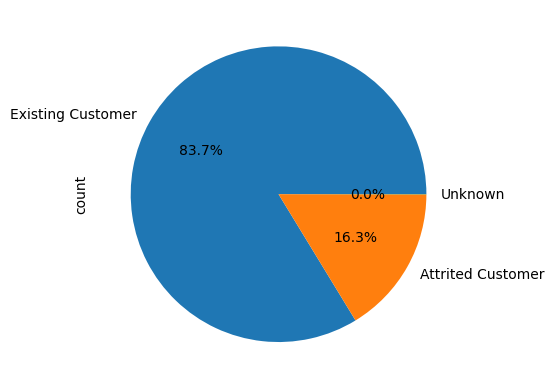

In [11]:
df['Attrition_Flag'].value_counts().plot(kind='pie',autopct='%1.1f%%') #unbalanced might need upsampling

In [12]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace('Unknown',np.random.choice(['Attrited Customer','Existing Customer']))

<Axes: ylabel='count'>

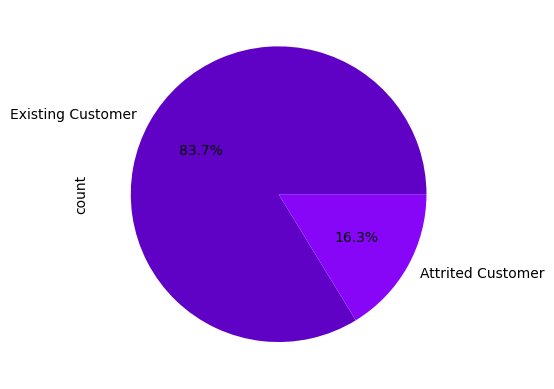

In [13]:
df['Attrition_Flag'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('gnuplot'))

In [14]:
df['Education_Level'].value_counts()

,count
Education_Level,
Graduate,3228
High School,2074
Unknown,1552
Uneducated,1535
College,1039
Post-Graduate,534
Doctorate,464


<Axes: ylabel='count'>

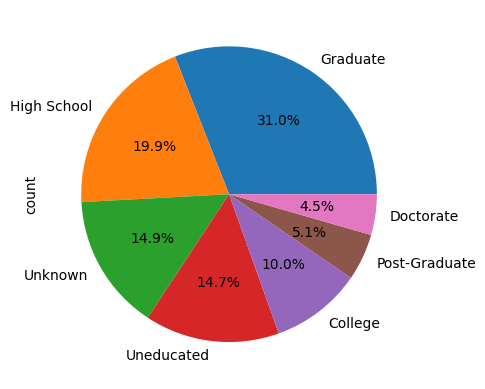

In [15]:
df['Education_Level'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [16]:
Marital_Status = df['Marital_Status'].value_counts()
Marital_Status

,count
Marital_Status,
Married,4873
Single,4021
Divorced,766
Unknown,766


<Axes: ylabel='count'>

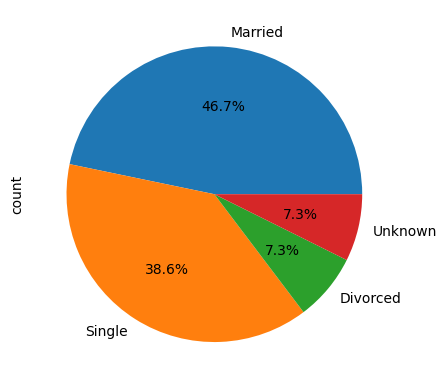

In [17]:
Marital_Status.plot(kind='pie',autopct='%1.1f%%')

In [18]:
df['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3675
$40K - $60K,1843
$80K - $120K,1575
$60K - $80K,1438
Unknown,1145
$120K +,750


<Axes: ylabel='count'>

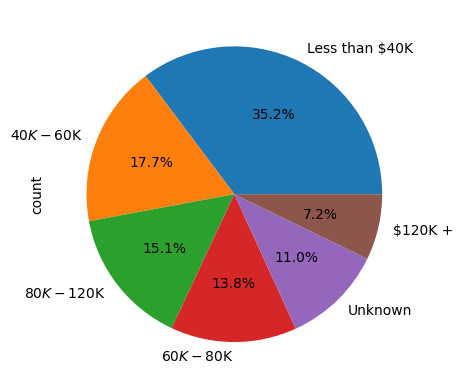

In [19]:
df['Income_Category'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [20]:
df['Card_Category'].value_counts()

,count
Card_Category,
Blue,9707
Silver,575
Gold,120
Platinum,20
Unknown,4


<Axes: ylabel='count'>

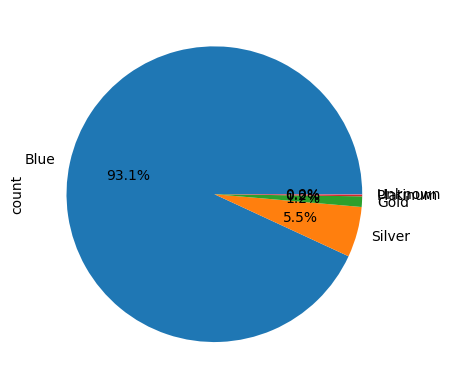

In [21]:
df['Card_Category'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [22]:
df['Card_Category'] = df['Card_Category'].replace('Unknown',np.random.choice(['Blue','Silver','Gold','Platinum']))

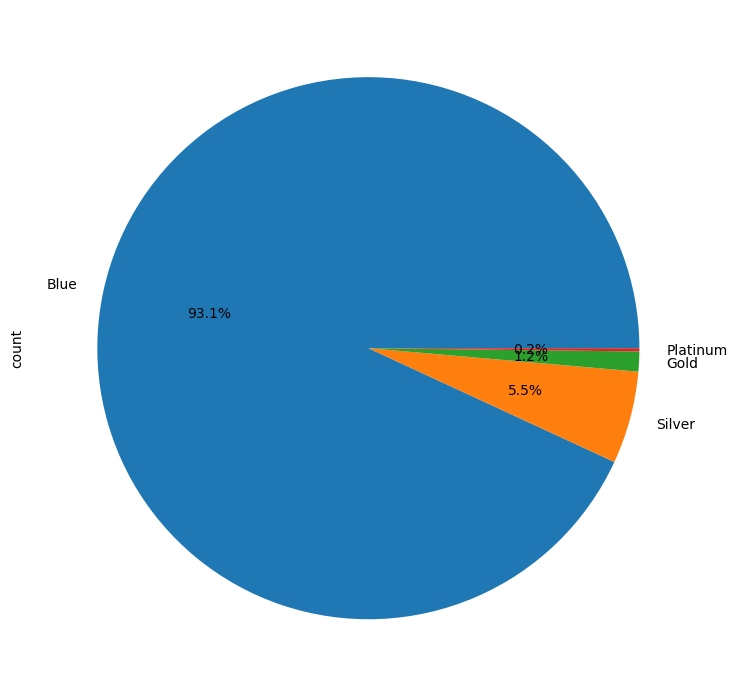

In [23]:
fig = plt.figure(figsize=(7.5,7.5))
df['Card_Category'].value_counts().plot(kind='pie',autopct='%1.1f%%')
fig.tight_layout()

In [24]:
unknown_cols = []
for cols in df.columns:
  if df[cols].isin(['Unknown']).any():
    unknown_cols.append(cols)
unknown_cols

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category']

In [25]:
df['Education_Level'].value_counts()

,count
Education_Level,
Graduate,3228
High School,2074
Unknown,1552
Uneducated,1535
College,1039
Post-Graduate,534
Doctorate,464


<Axes: ylabel='count'>

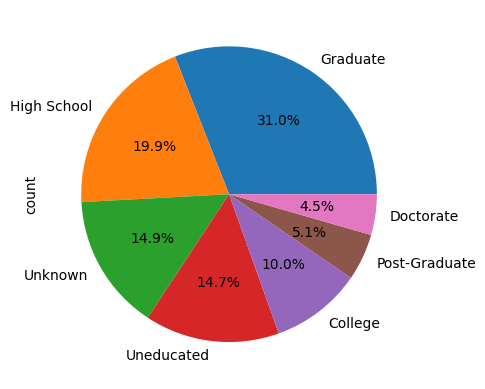

In [26]:
df['Education_Level'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# Imputing missing gender data

In [27]:
df['Gender'].value_counts()

,count
Gender,
F,5518
M,4905
Unknown,3


<Axes: ylabel='count'>

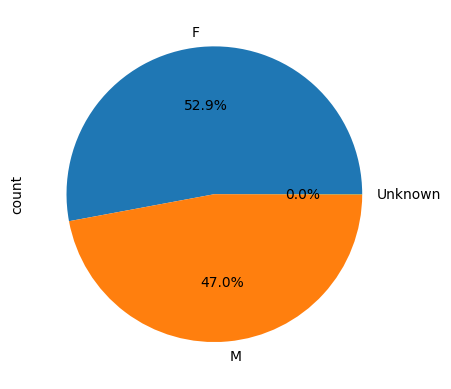

In [28]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [29]:
df['Gender'] = df['Gender'].replace('Unknown',np.random.choice(['M','F']))

<Axes: ylabel='count'>

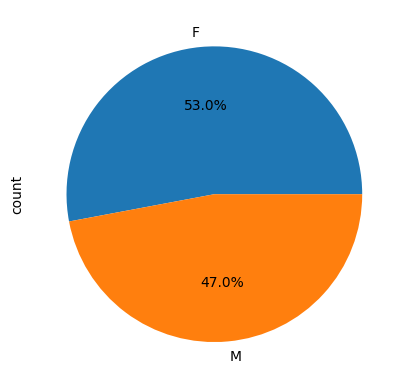

In [30]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# Age Preprocessing

In [31]:
#making sure age matches date of birth and no one under 18 is married or divorced(if so age is changed to 18 and dob is modified accordingly)
from datetime import date
import calendar

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

'''
for index in df.index:
    if df.loc[index, 'Age'] < 18 and df.loc[index,'Marital_Status'] == 'Married':

        day = df.loc[index, 'Date_of_birth'].day
        month = df.loc[index, 'Date_of_birth'].month
        year = date.today().year - 18

        if month == 2 and day == 29 and not calendar.isleap(year):
            day = 28

        df.loc[index, 'Date_of_birth'] = date(year, month, day)
'''

df['Age'] = df['Date_of_birth'].apply(calculate_age)
df

,Customer_Number,Attrition_Flag,Age,Date_of_birth,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3708092208,Existing Customer,45,1979-06-09,F,3,High School,Married,Less than $40K,Blue,...,3,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469
1,3708093408,Attrited Customer,58,1966-05-28,M,0,Unknown,Single,$40K - $60K,Blue,...,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
2,3708094683,Attrited Customer,46,1978-06-29,M,3,Doctorate,Divorced,$80K - $120K,Blue,...,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214
3,3708095583,Existing Customer,34,1990-06-23,F,2,Uneducated,Single,Less than $40K,Blue,...,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,3708097083,Existing Customer,49,1975-03-12,F,2,Uneducated,Married,Unknown,Blue,...,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12121,3828298458,Existing Customer,50,1974-03-29,M,0,Uneducated,Married,$60K - $80K,Blue,...,1,3,3640.0,659,2981.0,0.938,3756,70,0.842,0.181
12122,3828301983,Attrited Customer,38,1986-05-15,M,3,College,Single,$60K - $80K,Blue,...,3,4,12050.0,1821,10229.0,0.630,2381,40,0.481,0.151
12123,3828305058,Attrited Customer,49,1975-02-17,F,3,High School,Married,Less than $40K,Blue,...,2,3,2951.0,2437,514.0,0.765,2519,36,0.565,0.826
12124,3828309033,Existing Customer,54,1970-03-04,M,4,Graduate,Married,$120K +,Blue,...,2,0,2872.0,2035,837.0,0.613,1770,47,0.741,0.709


In [32]:
df['Age'].describe()

,Age
count,10426.000000
mean,46.222808
std,9.796840
min,10.000000
25%,41.000000
50%,46.000000
75%,52.000000
max,120.000000


In [33]:
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
iqr

11.0

In [34]:
upper = df['Age'].quantile(0.75) + 1.5*(iqr)
upper

68.5

In [35]:
lower = df['Age'].quantile(0.25) - 1.5*(iqr)
lower

24.5

In [36]:
df['Age'] = df['Age'].clip(lower-5,upper+5)

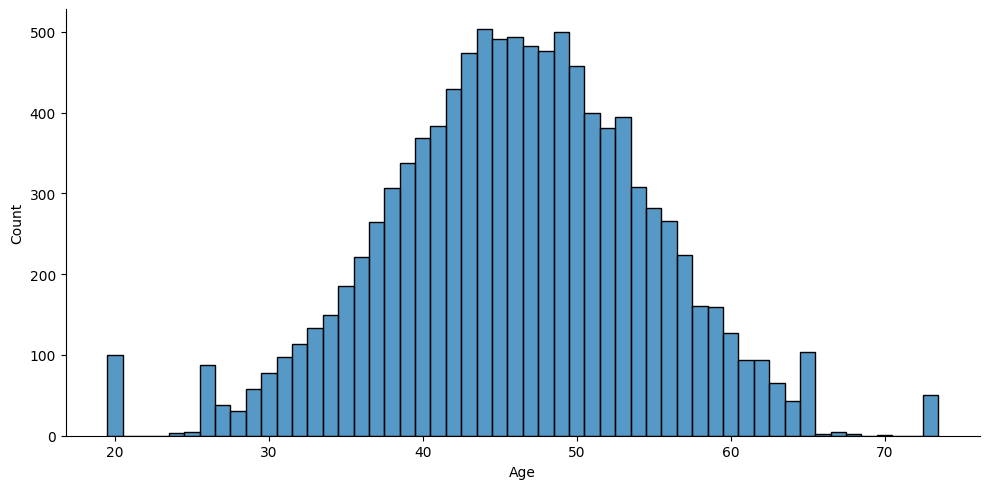

In [37]:
sns.displot(df['Age'],aspect=2)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Age'>

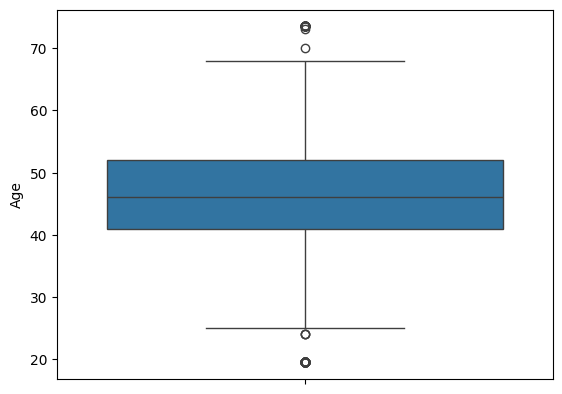

In [38]:
sns.boxplot(df['Age'])

In [39]:
df['Age'].describe()

,Age
count,10426.000000
mean,46.113706
std,8.659143
min,19.500000
25%,41.000000
50%,46.000000
75%,52.000000
max,73.500000


In [40]:
#match birthdate to age

def calculate_birthdate(age,dob):
    today = date.today()
    year = today.year - age
    month = dob.month
    day = dob.day
    return date(int(year), int(month), int(day))

df['Date_of_birth'] = df.apply(lambda x: calculate_birthdate(x['Age'],x['Date_of_birth']),axis=1)
df

,Customer_Number,Attrition_Flag,Age,Date_of_birth,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3708092208,Existing Customer,45.0,1979-06-09,F,3,High School,Married,Less than $40K,Blue,...,3,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469
1,3708093408,Attrited Customer,58.0,1966-05-28,M,0,Unknown,Single,$40K - $60K,Blue,...,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
2,3708094683,Attrited Customer,46.0,1978-06-29,M,3,Doctorate,Divorced,$80K - $120K,Blue,...,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214
3,3708095583,Existing Customer,34.0,1990-06-23,F,2,Uneducated,Single,Less than $40K,Blue,...,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,3708097083,Existing Customer,49.0,1975-03-12,F,2,Uneducated,Married,Unknown,Blue,...,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12121,3828298458,Existing Customer,50.0,1974-03-29,M,0,Uneducated,Married,$60K - $80K,Blue,...,1,3,3640.0,659,2981.0,0.938,3756,70,0.842,0.181
12122,3828301983,Attrited Customer,38.0,1986-05-15,M,3,College,Single,$60K - $80K,Blue,...,3,4,12050.0,1821,10229.0,0.630,2381,40,0.481,0.151
12123,3828305058,Attrited Customer,49.0,1975-02-17,F,3,High School,Married,Less than $40K,Blue,...,2,3,2951.0,2437,514.0,0.765,2519,36,0.565,0.826
12124,3828309033,Existing Customer,54.0,1970-03-04,M,4,Graduate,Married,$120K +,Blue,...,2,0,2872.0,2035,837.0,0.613,1770,47,0.741,0.709


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


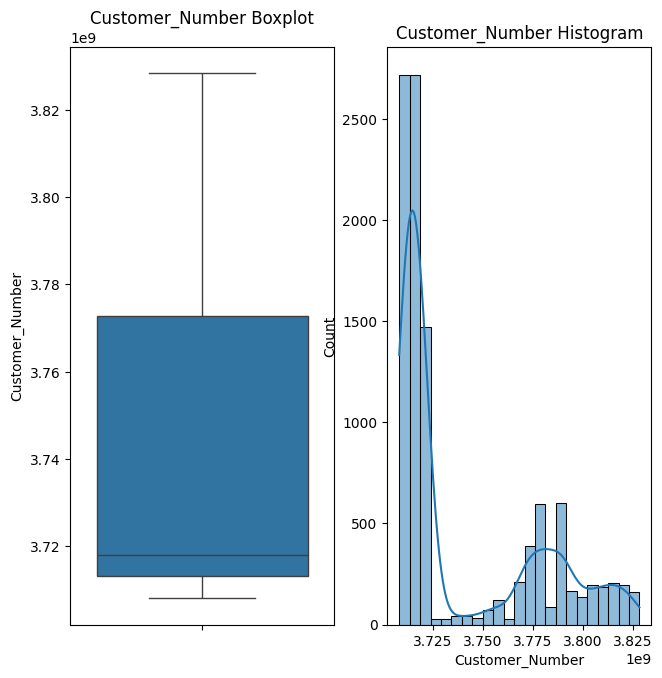

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


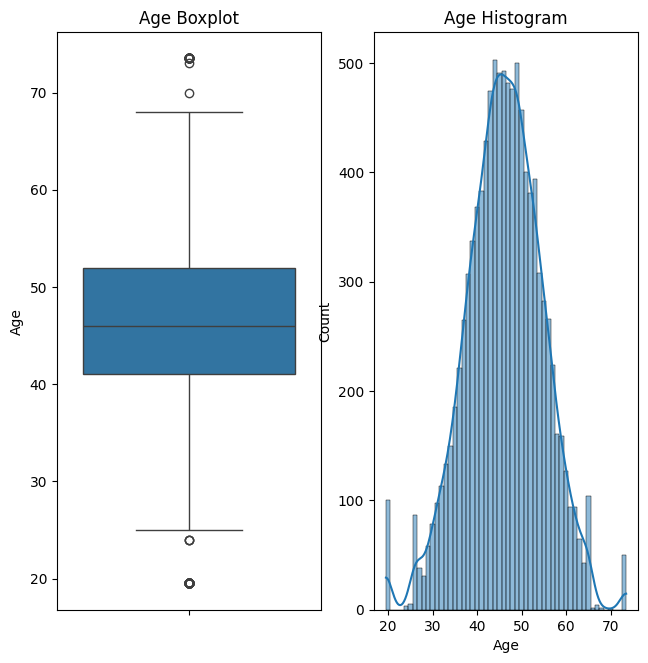

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


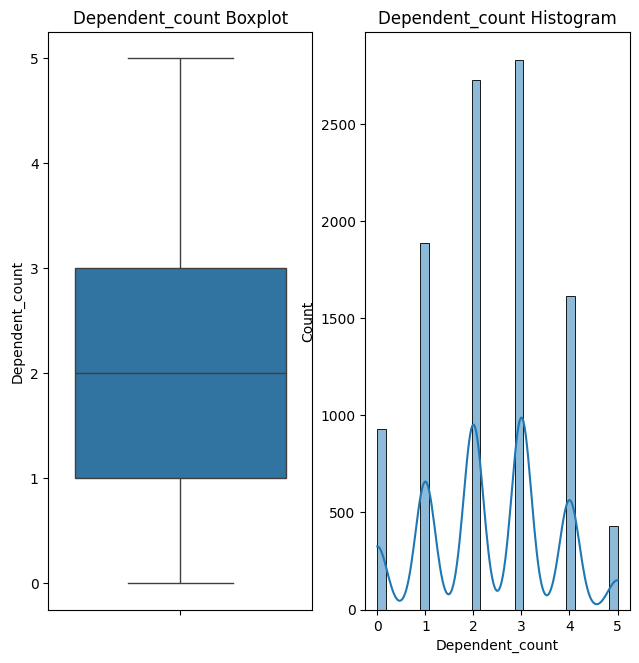

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


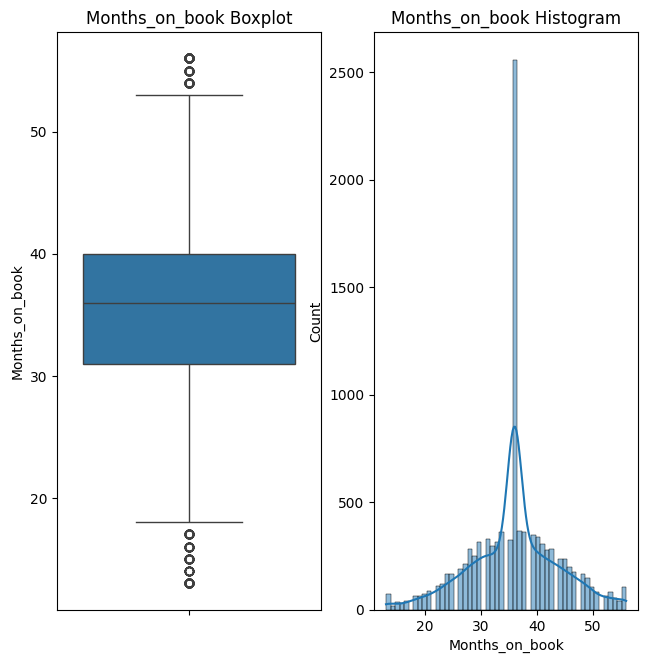

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


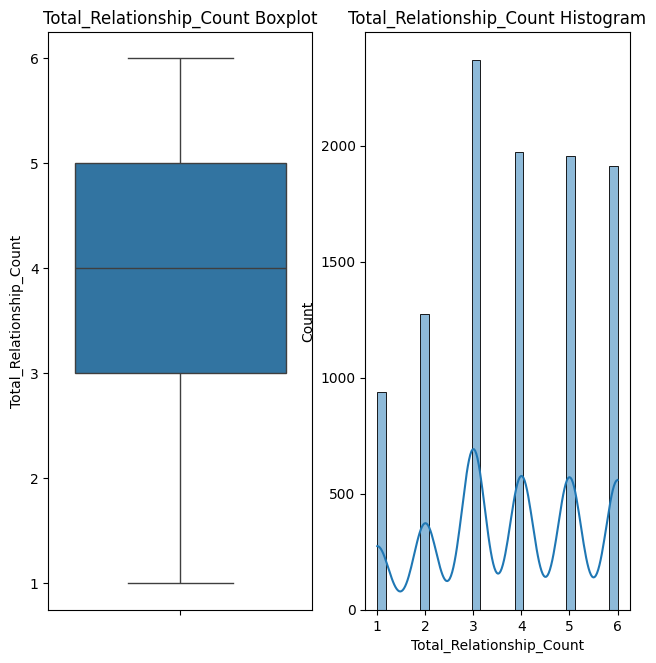

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


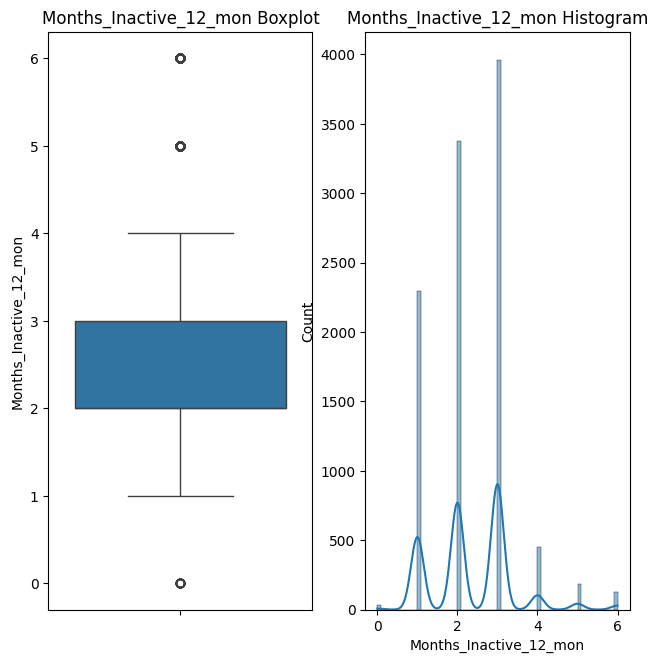

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


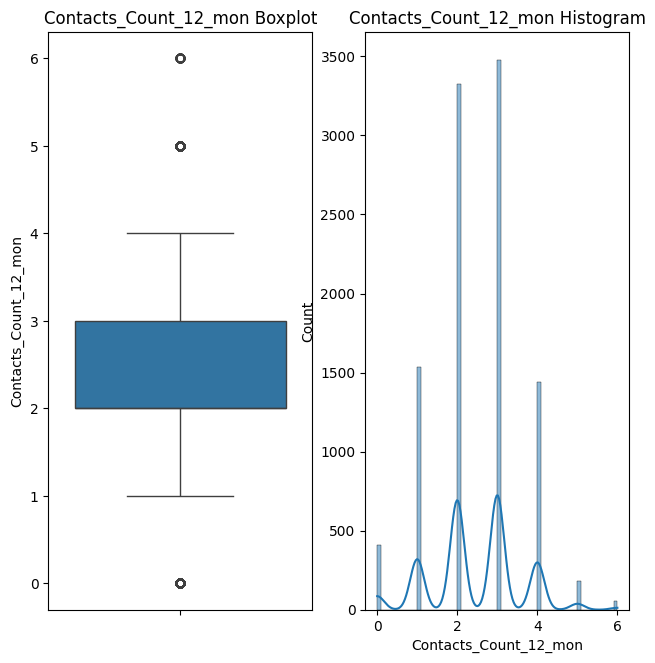

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


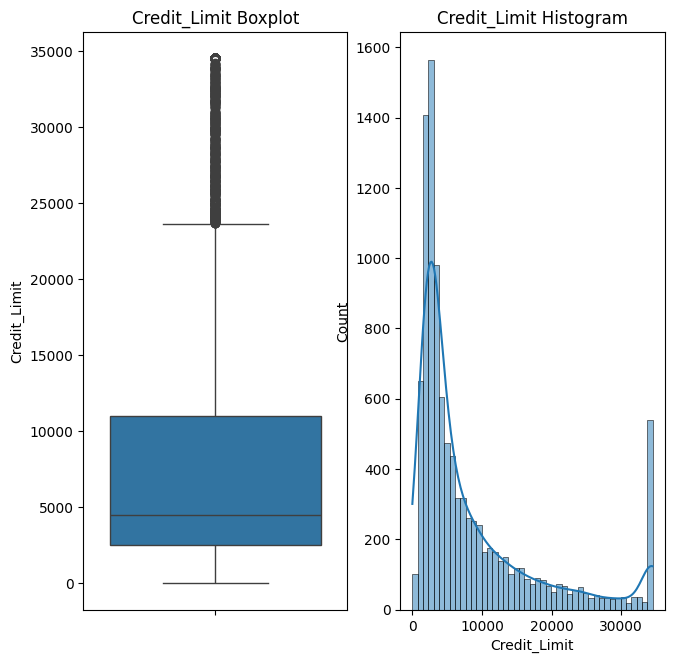

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


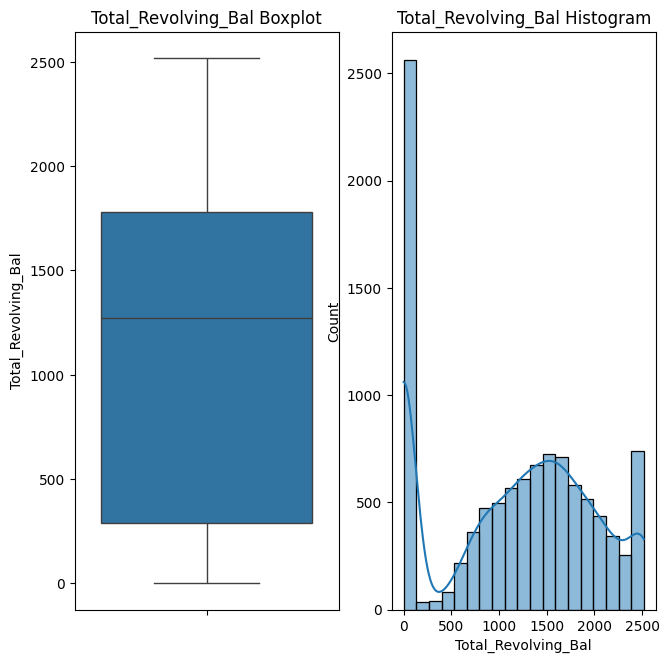

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


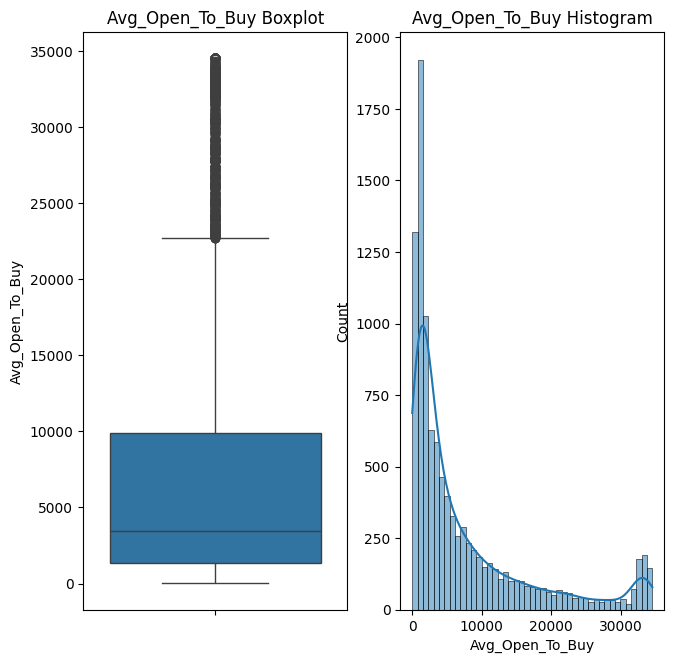

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


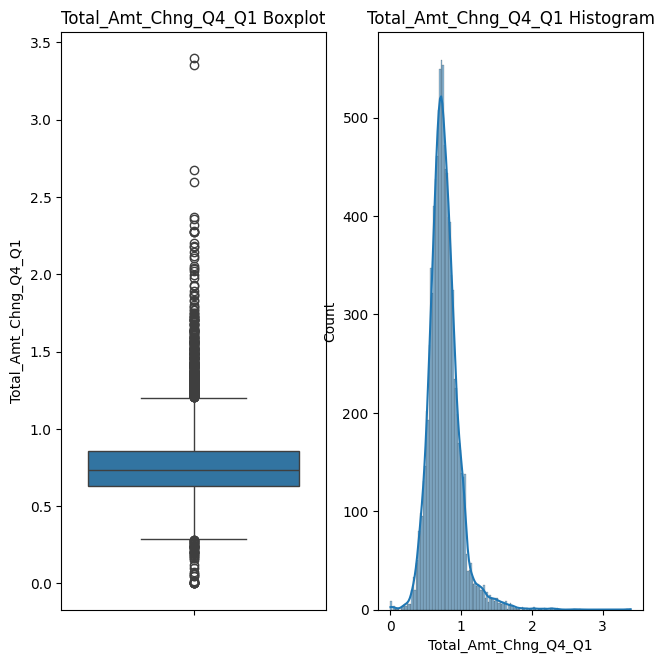

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


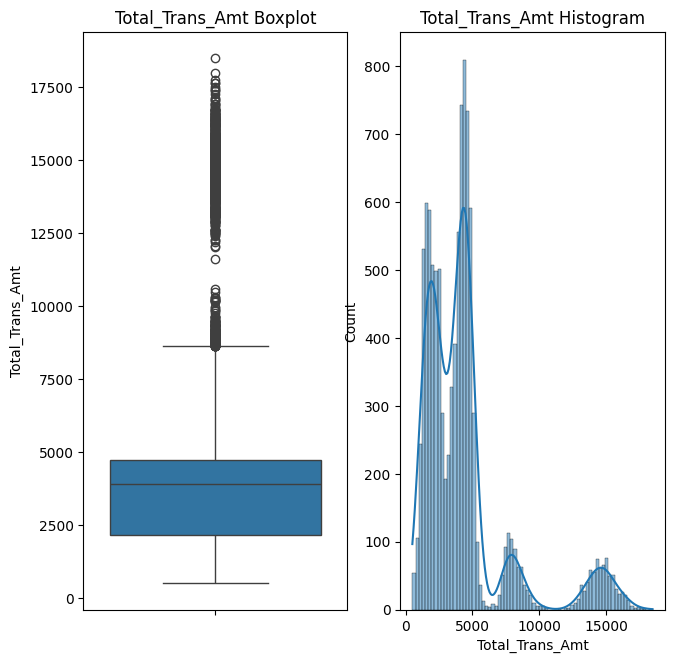

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


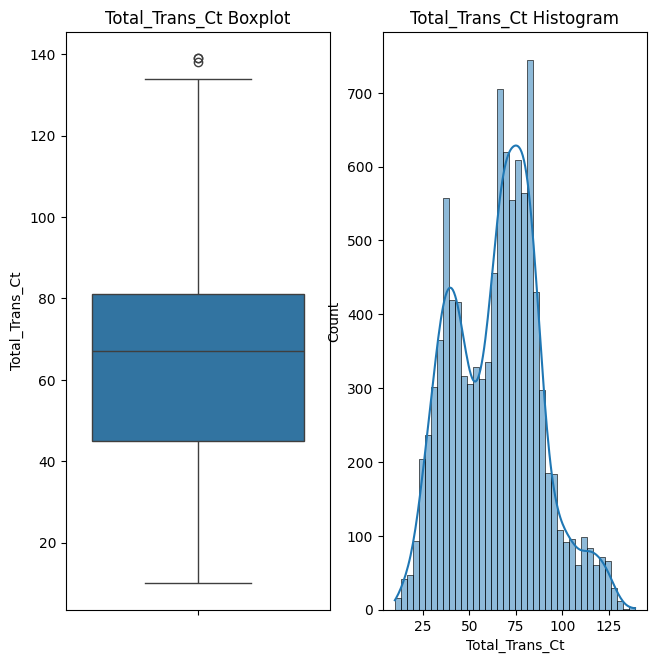

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


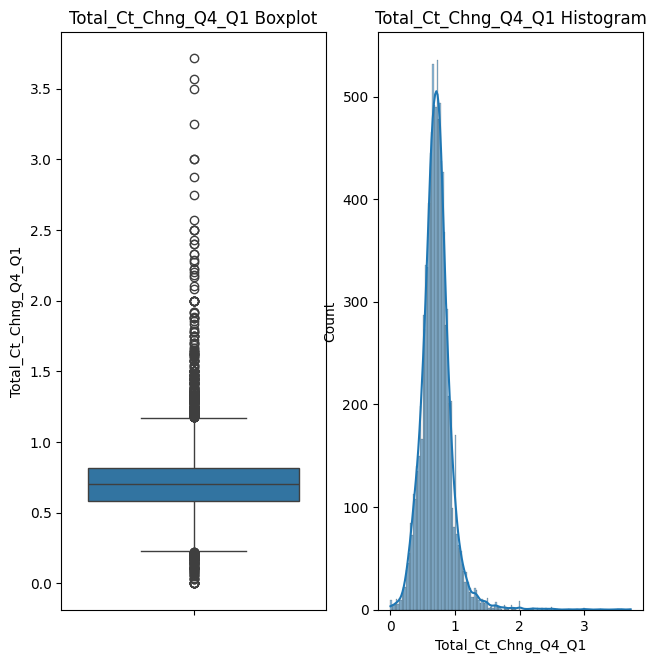

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


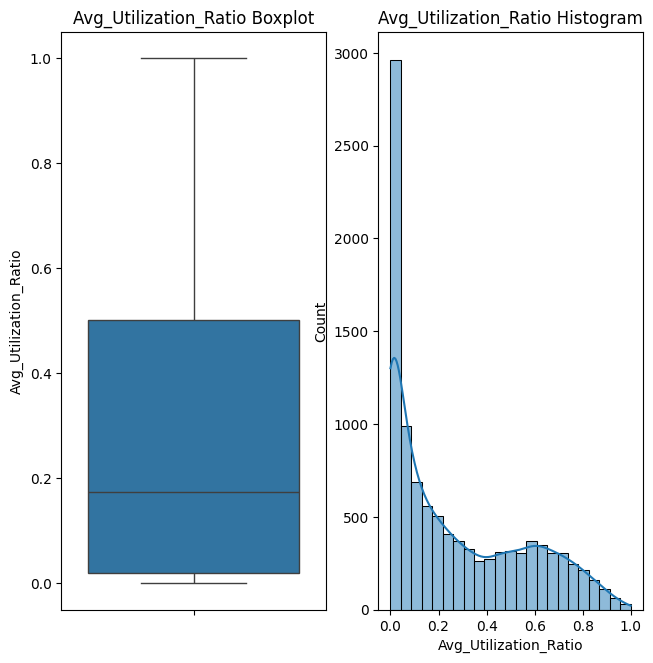

In [41]:
numeric = df.select_dtypes(include='number')

def boxplot_histogram(df,col,Kde):
  fig, axes = plt.subplots(1, 2, figsize=(7.5, 7.5))
  sns.boxplot(df[col],ax=axes[0])
  sns.histplot(df[col],ax=axes[1],kde=Kde)

  axes[0].set_title(f'{col} Boxplot')
  axes[1].set_title(f'{col} Histogram')

  plt.show()
numeric.drop('Customer_Number',axis=1)
for col in numeric.columns:
  boxplot_histogram(numeric,col,Kde=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


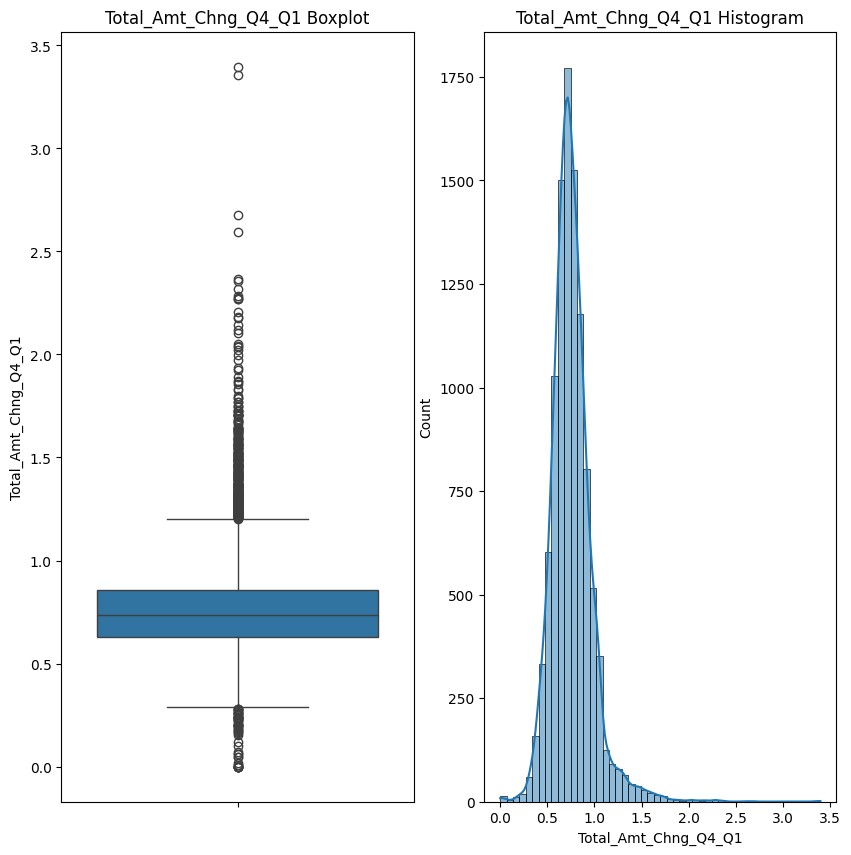

In [71]:
def boxplot_histogram(df,col,Kde):
  fig, axes = plt.subplots(1, 2, figsize=(10, 10))
  sns.boxplot(df[col],ax=axes[0])
  sns.histplot(df[col],ax=axes[1],kde=Kde,bins=50)

  axes[0].set_title(f'{col} Boxplot')
  axes[1].set_title(f'{col} Histogram')

  plt.show()

boxplot_histogram(numeric,'Total_Amt_Chng_Q4_Q1',Kde=True)

In [42]:
df.describe()

,Customer_Number,Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.042600e+04,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000,10426.000000
mean,3.739228e+09,46.113706,2.346058,35.924324,3.812680,2.342509,2.457606,8549.226655,1159.773355,7471.846787,0.759746,4400.025225,64.808364,0.711356,0.274140
std,3.666662e+07,8.659143,1.297236,7.980391,1.553187,1.010159,1.106933,9084.796618,816.233550,9087.196847,0.220077,3395.618985,23.497744,0.238069,0.275875
min,3.708092e+09,19.500000,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,3.713119e+09,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2515.250000,287.250000,1334.250000,0.630000,2153.000000,45.000000,0.581000,0.020000
50%,3.718089e+09,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4469.000000,1274.000000,3476.500000,0.736000,3895.000000,67.000000,0.700000,0.174500
75%,3.772663e+09,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10972.750000,1782.000000,9882.250000,0.859000,4740.000000,81.000000,0.818000,0.501000
max,3.828353e+09,73.500000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Correlations & EDA

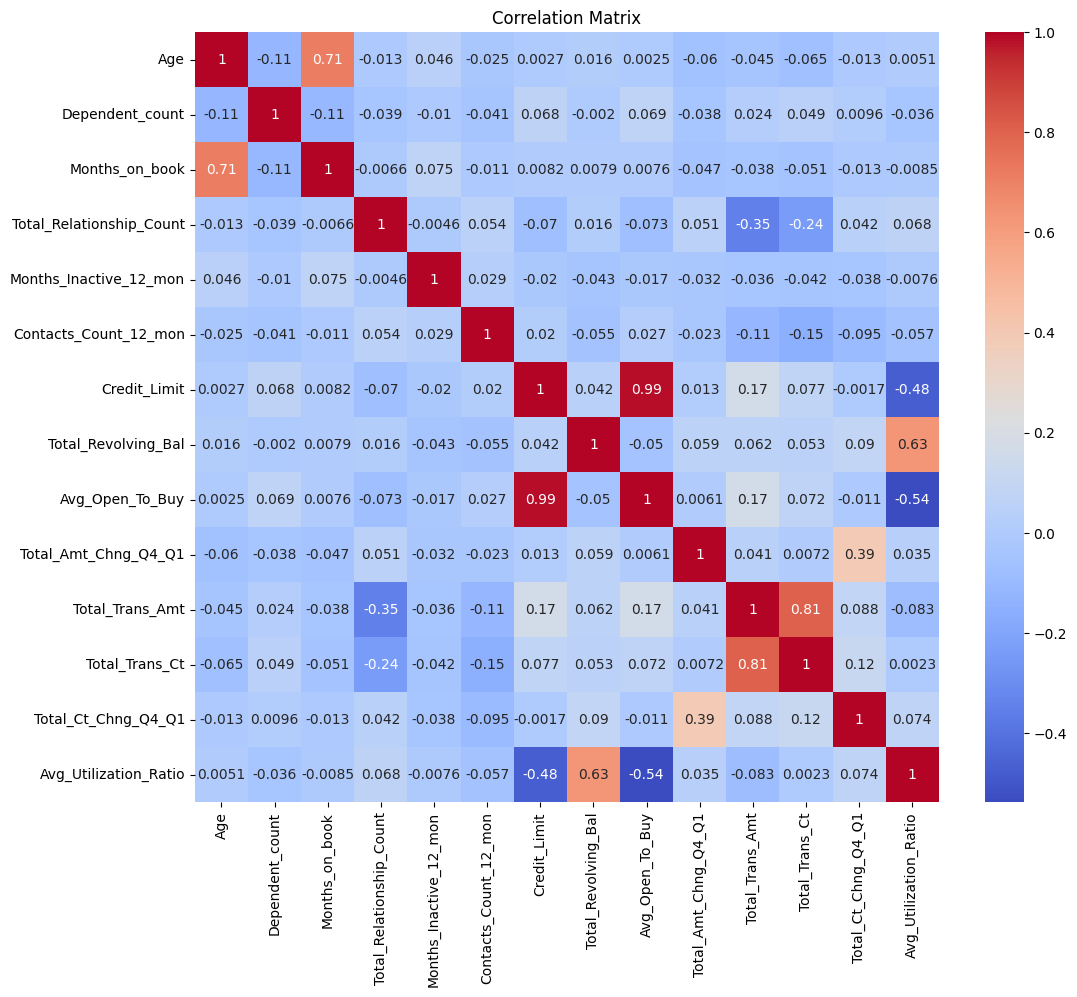

In [43]:
numeric.drop('Customer_Number', axis=1,inplace=True)

correlation_matrix = numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [44]:
attrited_data=df[df['Attrition_Flag'] == 'Attrited Customer']
existing_data=df[df['Attrition_Flag'] == 'Existing Customer']

In [45]:
attrited_data.describe()

,Customer_Number,Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.695000e+03,1695.00000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000
mean,3.735452e+09,46.39882,2.397050,36.181121,3.280236,2.694985,2.970501,8001.349322,676.121534,7439.767198,0.693236,3108.218289,44.919764,0.552143,0.163080
std,3.520209e+07,8.57710,1.268961,7.798049,1.575695,0.899727,1.096448,9057.744665,921.906497,9048.270811,0.217167,2333.588281,14.731823,0.227999,0.265159
min,3.708093e+09,19.50000,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,3.712456e+09,41.00000,2.000000,32.000000,2.000000,2.000000,2.000000,2032.000000,0.000000,1576.500000,0.543500,1899.000000,37.000000,0.400000,0.000000
50%,3.716722e+09,46.00000,2.000000,36.000000,3.000000,3.000000,3.000000,4097.000000,0.000000,3521.000000,0.699000,2323.000000,43.000000,0.529000,0.000000
75%,3.767489e+09,52.00000,3.000000,40.000000,5.000000,3.000000,4.000000,9753.500000,1325.000000,9257.500000,0.857000,2774.000000,51.000000,0.692000,0.231000
max,3.828305e+09,73.50000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


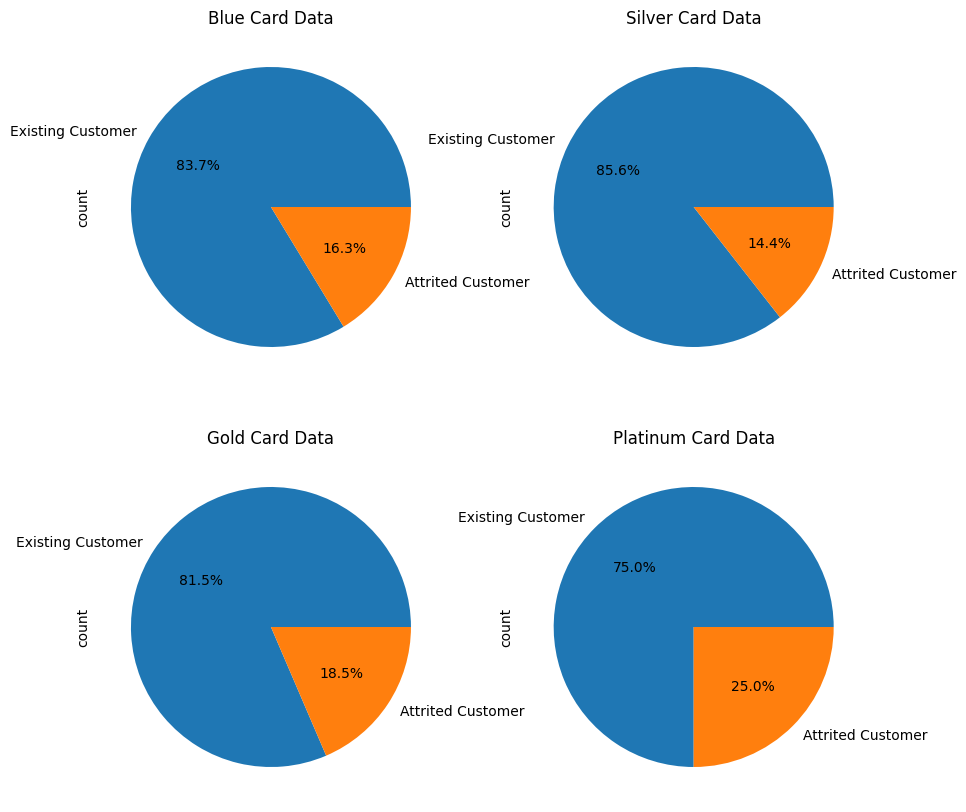

In [46]:
blue_card_data = df[df['Card_Category'] == 'Blue']
silver_card_data = df[df['Card_Category'] == 'Silver']
gold_card_data = df[df['Card_Category'] == 'Gold']
platinum_card_data = df[df['Card_Category'] == 'Platinum']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0,0].set_title('Blue Card Data')
blue_card_data['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%',ax=axes[0,0])

axes[0,1].set_title('Silver Card Data')
silver_card_data['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%',ax=axes[0,1])

axes[1,0].set_title('Gold Card Data')
gold_card_data['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%',ax=axes[1,0])

axes[1,1].set_title('Platinum Card Data')
platinum_card_data['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%',ax=axes[1,1])

plt.show()


#larger proportion of attrited customers in platinum card

# Behavioral Data associated with Churn

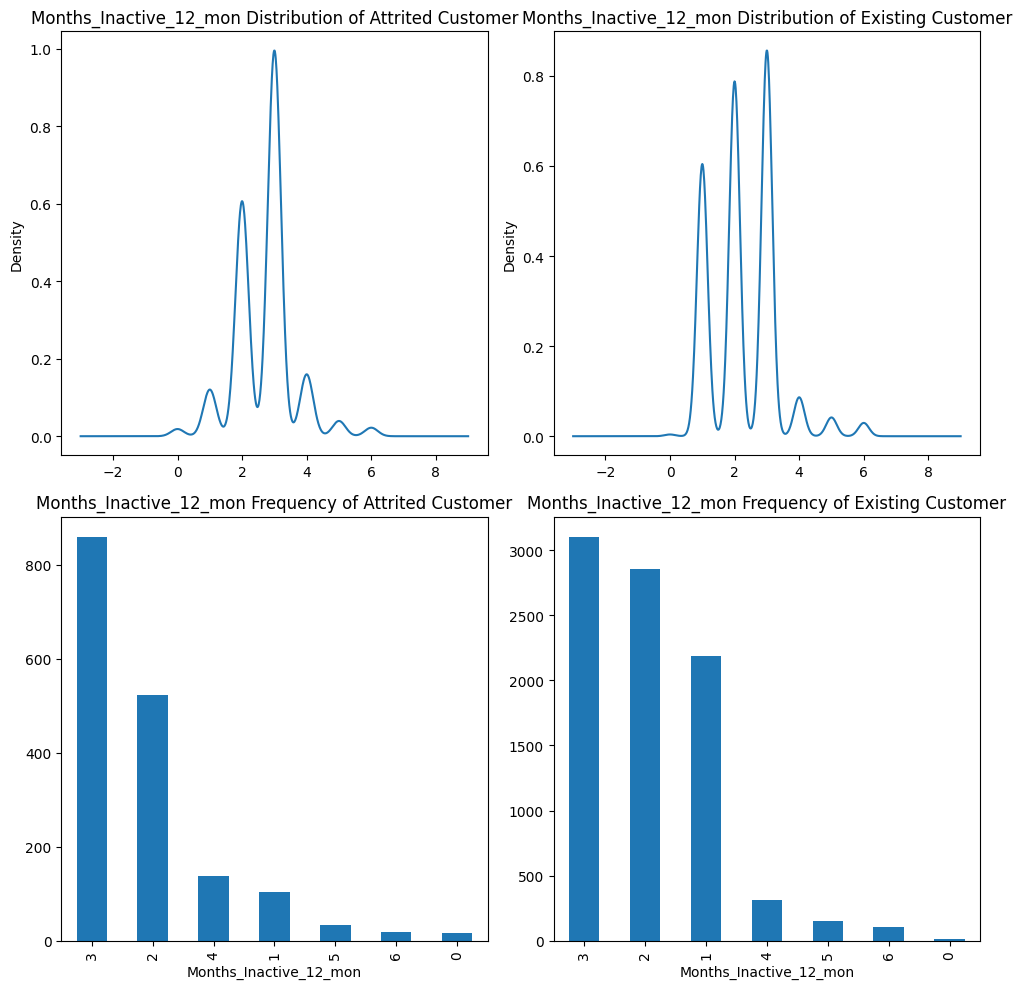

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

attrited_data['Months_Inactive_12_mon'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('Months_Inactive_12_mon Distribution of Attrited Customer')

existing_data['Months_Inactive_12_mon'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('Months_Inactive_12_mon Distribution of Existing Customer')

attrited_data['Months_Inactive_12_mon'].value_counts().plot(kind='bar',ax=axes[1,0])
axes[1,0].set_title('Months_Inactive_12_mon Frequency of Attrited Customer')

existing_data['Months_Inactive_12_mon'].value_counts().plot(kind='bar',ax=axes[1,1])
axes[1,1].set_title('Months_Inactive_12_mon Frequency of Existing Customer')

fig.tight_layout()

plt.show()

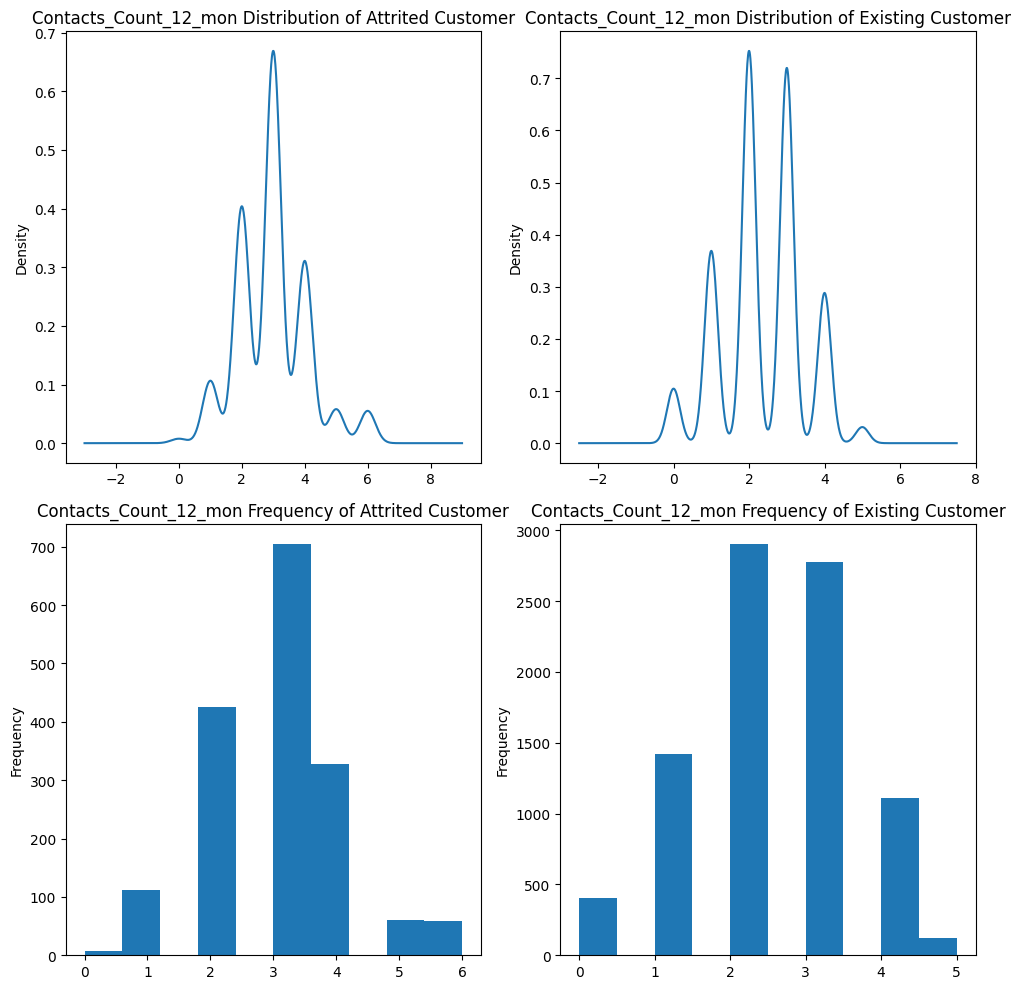

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

attrited_data['Contacts_Count_12_mon'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('Contacts_Count_12_mon Distribution of Attrited Customer')

existing_data['Contacts_Count_12_mon'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('Contacts_Count_12_mon Distribution of Existing Customer')

attrited_data['Contacts_Count_12_mon'].plot(kind='hist',ax=axes[1,0])
axes[1,0].set_title('Contacts_Count_12_mon Frequency of Attrited Customer')

existing_data['Contacts_Count_12_mon'].plot(kind='hist',ax=axes[1,1])
axes[1,1].set_title('Contacts_Count_12_mon Frequency of Existing Customer')

plt.tight_layout()

plt.show()

<ipython-input-49-43f64354070b>:15: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


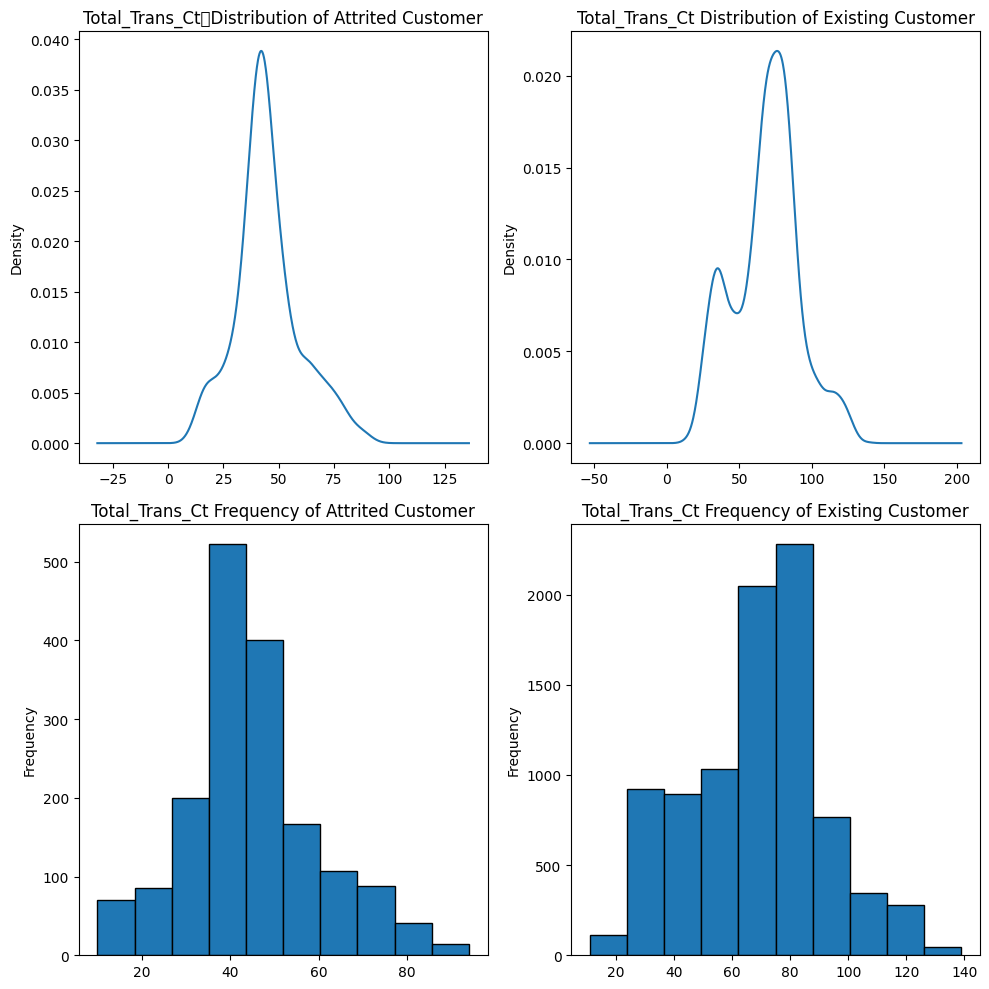

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

attrited_data['Total_Trans_Ct'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('Total_Trans_Ct	Distribution of Attrited Customer')

existing_data['Total_Trans_Ct'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('Total_Trans_Ct Distribution of Existing Customer')

attrited_data['Total_Trans_Ct'].plot(kind='hist',ax=axes[1,0],edgecolor='black')
axes[1,0].set_title('Total_Trans_Ct Frequency of Attrited Customer')

existing_data['Total_Trans_Ct'].plot(kind='hist',ax=axes[1,1],edgecolor='black')
axes[1,1].set_title('Total_Trans_Ct Frequency of Existing Customer')

plt.tight_layout()

plt.show()

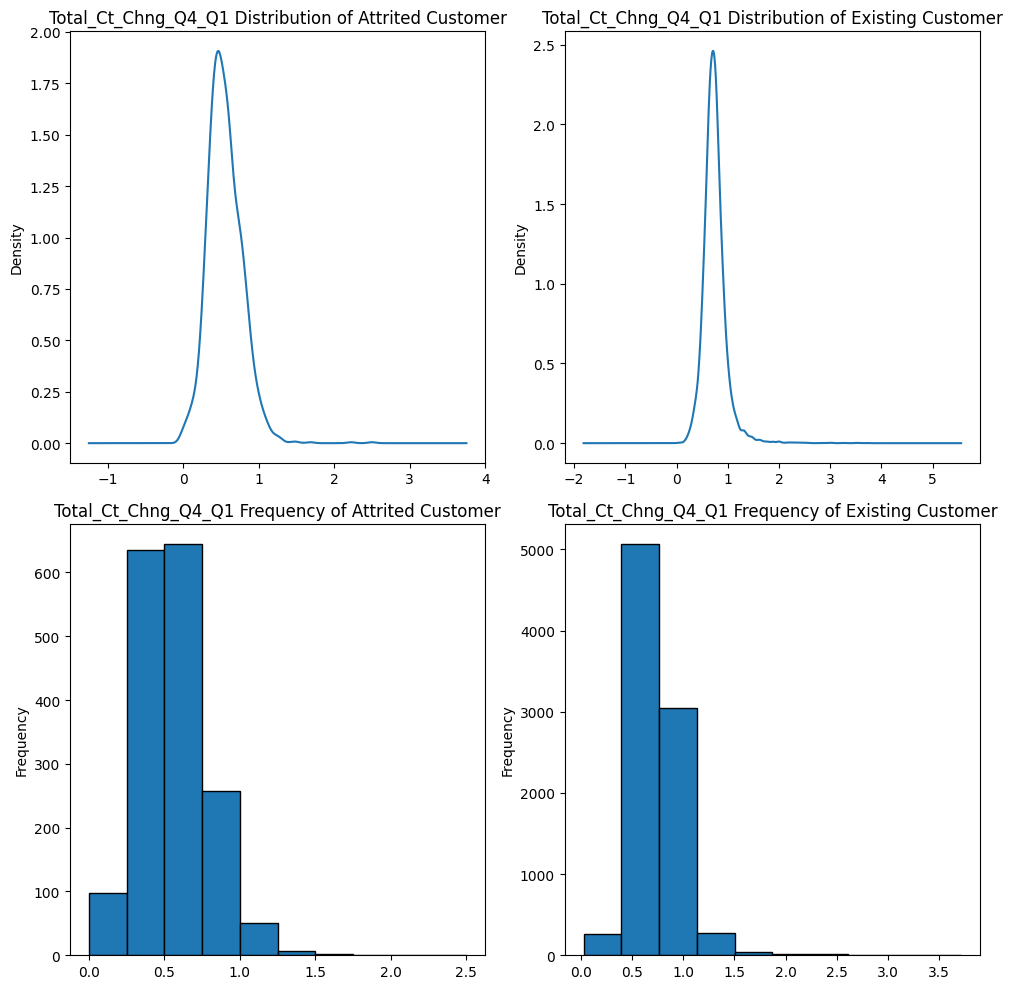

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

attrited_data['Total_Ct_Chng_Q4_Q1'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('Total_Ct_Chng_Q4_Q1 Distribution of Attrited Customer')

existing_data['Total_Ct_Chng_Q4_Q1'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('Total_Ct_Chng_Q4_Q1 Distribution of Existing Customer')

attrited_data['Total_Ct_Chng_Q4_Q1'].plot(kind='hist',ax=axes[1,0],edgecolor='black')
axes[1,0].set_title('Total_Ct_Chng_Q4_Q1 Frequency of Attrited Customer')

existing_data['Total_Ct_Chng_Q4_Q1'].plot(kind='hist',ax=axes[1,1],edgecolor='black')
axes[1,1].set_title('Total_Ct_Chng_Q4_Q1 Frequency of Existing Customer')

plt.tight_layout()

plt.show()

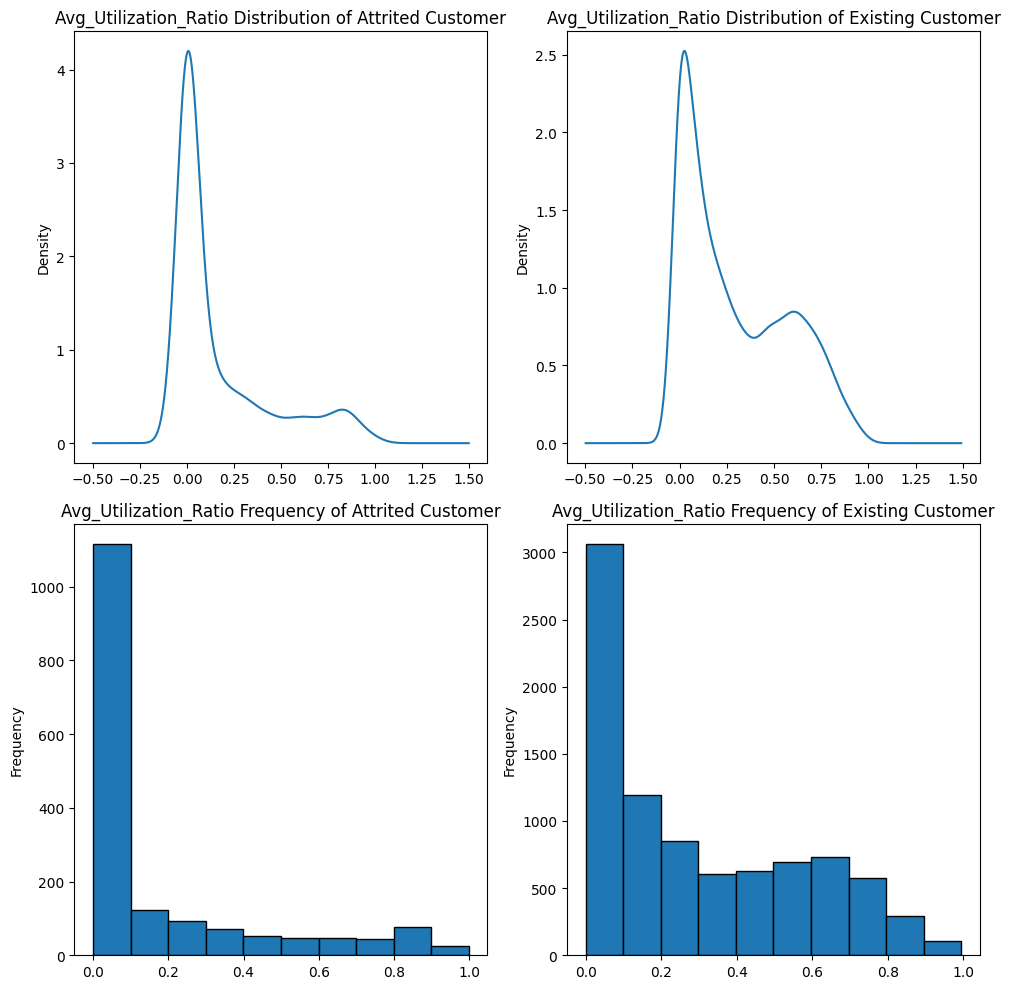

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

attrited_data['Avg_Utilization_Ratio'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('Avg_Utilization_Ratio Distribution of Attrited Customer')

existing_data['Avg_Utilization_Ratio'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('Avg_Utilization_Ratio Distribution of Existing Customer')

attrited_data['Avg_Utilization_Ratio'].plot(kind='hist',ax=axes[1,0],edgecolor='black')
axes[1,0].set_title('Avg_Utilization_Ratio Frequency of Attrited Customer')

existing_data['Avg_Utilization_Ratio'].plot(kind='hist',ax=axes[1,1],edgecolor='black')
axes[1,1].set_title('Avg_Utilization_Ratio Frequency of Existing Customer')

plt.tight_layout()

plt.show()

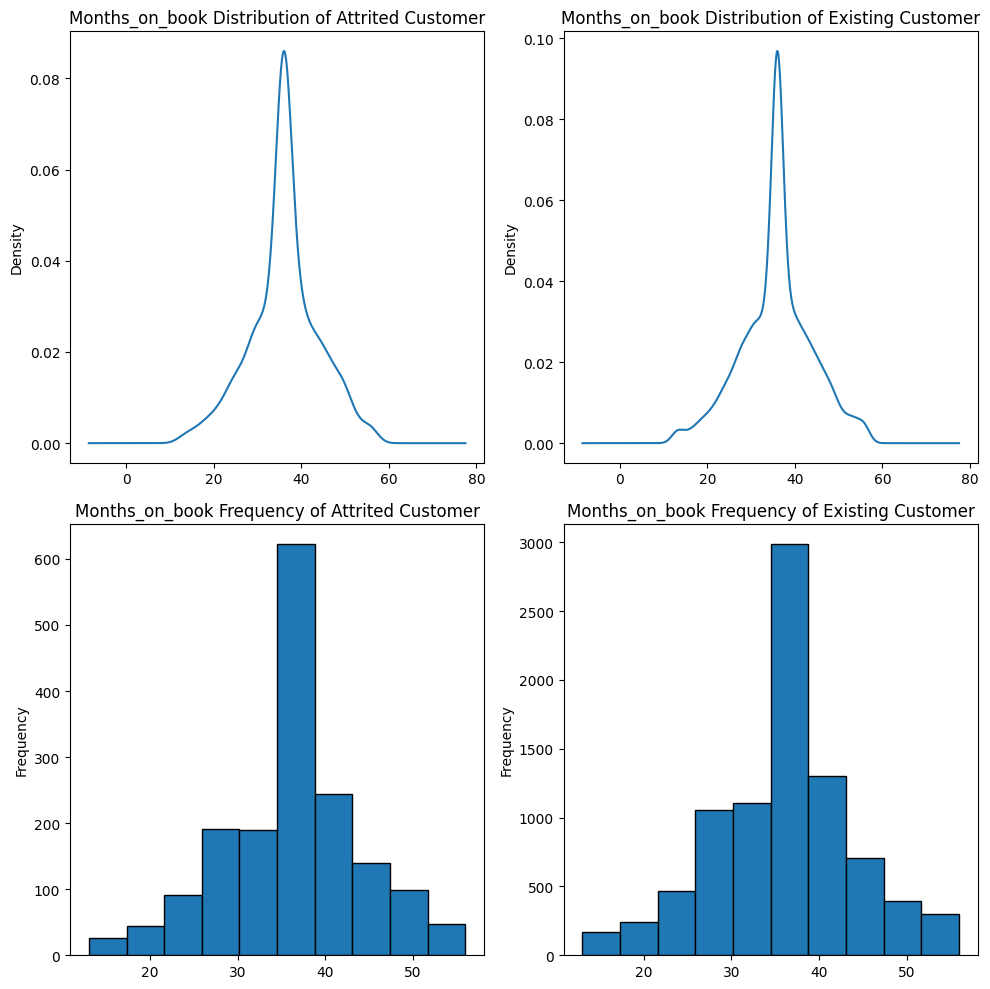

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

attrited_data['Months_on_book'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('Months_on_book Distribution of Attrited Customer')

existing_data['Months_on_book'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('Months_on_book Distribution of Existing Customer')

attrited_data['Months_on_book'].plot(kind='hist',ax=axes[1,0],edgecolor='black')
axes[1,0].set_title('Months_on_book Frequency of Attrited Customer')

existing_data['Months_on_book'].plot(kind='hist',ax=axes[1,1],edgecolor='black')
axes[1,1].set_title('Months_on_book Frequency of Existing Customer')

plt.tight_layout()

plt.show()

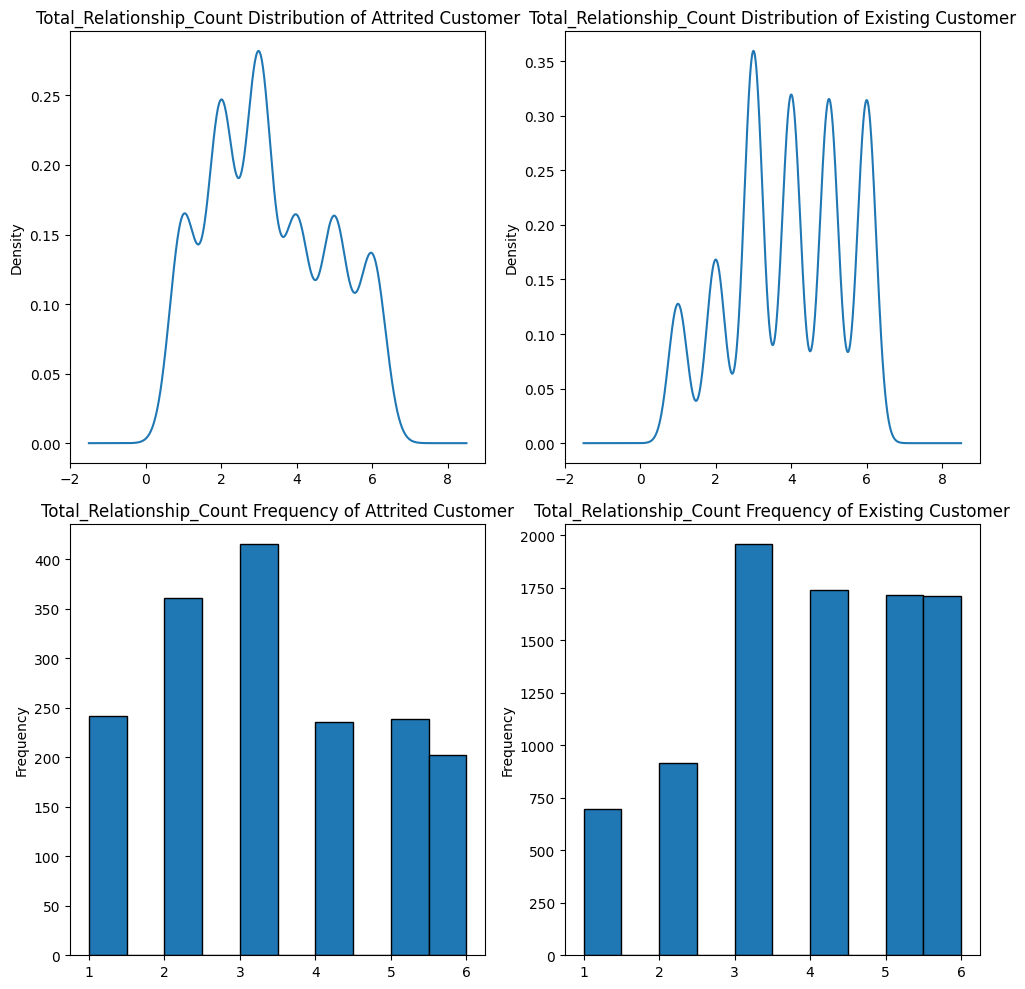

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

attrited_data['Total_Relationship_Count'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('Total_Relationship_Count Distribution of Attrited Customer')

existing_data['Total_Relationship_Count'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('Total_Relationship_Count Distribution of Existing Customer')

attrited_data['Total_Relationship_Count'].plot(kind='hist',ax=axes[1,0],edgecolor='black')
axes[1,0].set_title('Total_Relationship_Count Frequency of Attrited Customer')

existing_data['Total_Relationship_Count'].plot(kind='hist',ax=axes[1,1],edgecolor='black')
axes[1,1].set_title('Total_Relationship_Count Frequency of Existing Customer')

plt.tight_layout()

plt.show()

# Financial indicators of Churn

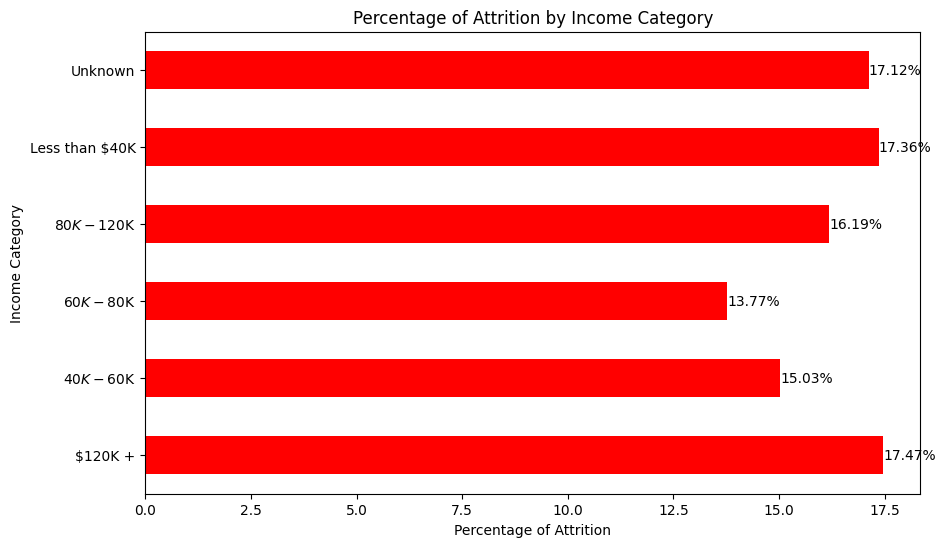

In [54]:

import matplotlib.pyplot as plt
attrition_by_income = df.groupby(['Income_Category', 'Attrition_Flag'])['Customer_Number'].count().unstack()
attrition_percentage = attrition_by_income.div(attrition_by_income.sum(axis=1), axis=0) * 100

attrition_percentage[['Attrited Customer']].plot(kind='barh', figsize=(10, 6),legend=False,color='red')
plt.title('Percentage of Attrition by Income Category')
plt.ylabel('Income Category')
plt.xlabel('Percentage of Attrition')

for index, value in enumerate(attrition_percentage['Attrited Customer']):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center')
plt.show()


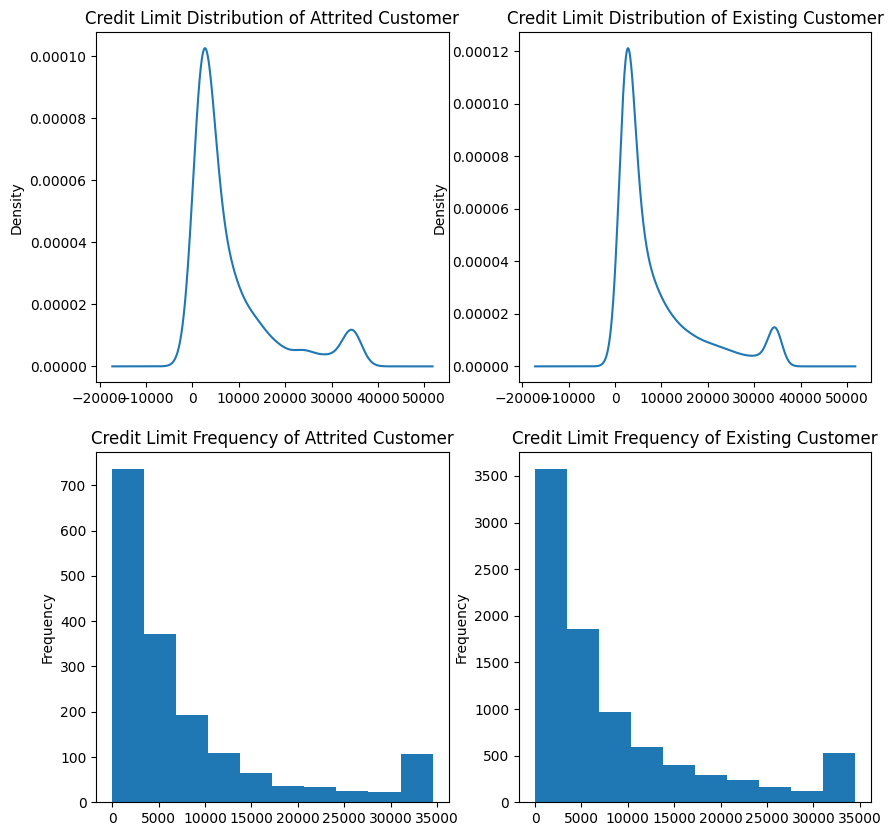

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

attrited_data['Credit_Limit'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('Credit Limit Distribution of Attrited Customer')

existing_data['Credit_Limit'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('Credit Limit Distribution of Existing Customer')

attrited_data['Credit_Limit'].plot(kind='hist',ax=axes[1,0])
axes[1,0].set_title('Credit Limit Frequency of Attrited Customer')

existing_data['Credit_Limit'].plot(kind='hist',ax=axes[1,1])
axes[1,1].set_title('Credit Limit Frequency of Existing Customer')

plt.show()

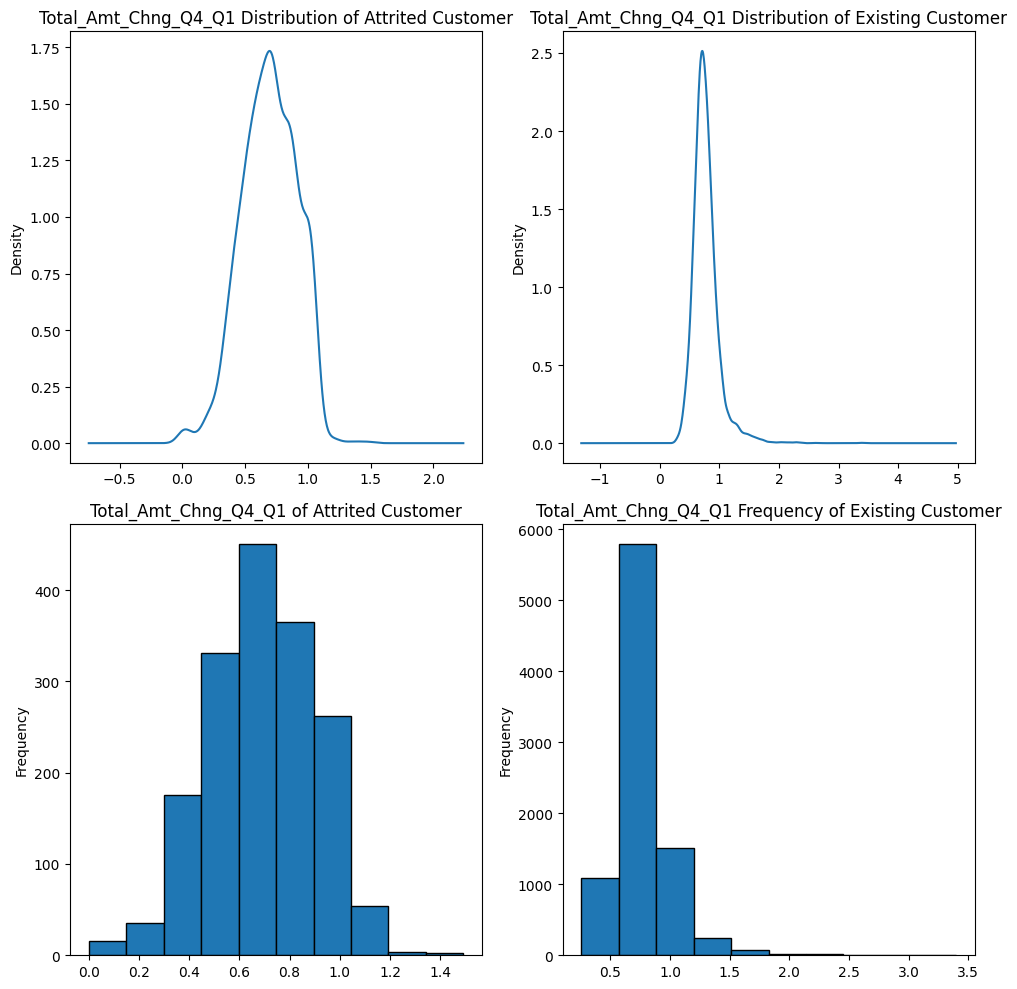

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) #more variation vs more stability

attrited_data['Total_Amt_Chng_Q4_Q1'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('Total_Amt_Chng_Q4_Q1 Distribution of Attrited Customer')

existing_data['Total_Amt_Chng_Q4_Q1'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('Total_Amt_Chng_Q4_Q1 Distribution of Existing Customer')

attrited_data['Total_Amt_Chng_Q4_Q1'].plot(kind='hist',ax=axes[1,0],edgecolor='black')
axes[1,0].set_title('Total_Amt_Chng_Q4_Q1 of Attrited Customer')

existing_data['Total_Amt_Chng_Q4_Q1'].plot(kind='hist',ax=axes[1,1],edgecolor='black')
axes[1,1].set_title('Total_Amt_Chng_Q4_Q1 Frequency of Existing Customer')

fig.tight_layout()

plt.show()

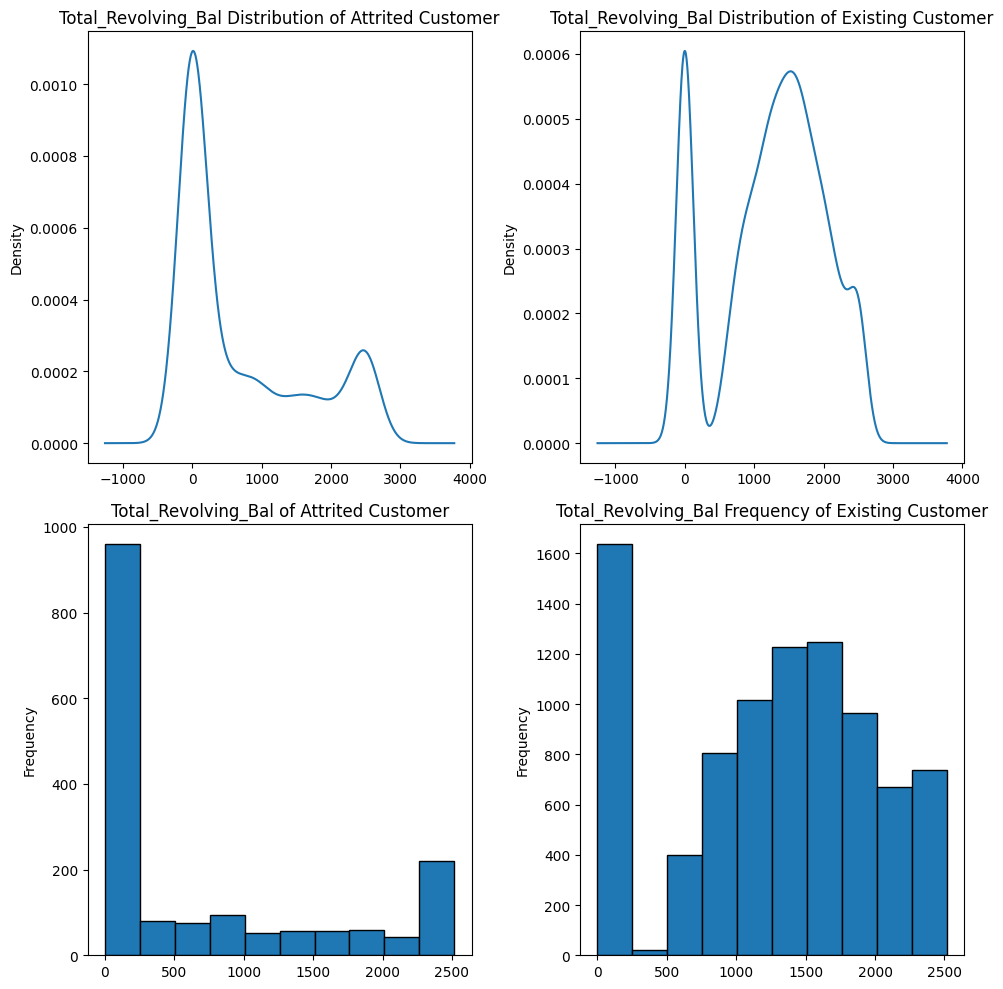

In [57]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10)) #as the total revolving balance increases the number of attrited decreases

attrited_data['Total_Revolving_Bal'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('Total_Revolving_Bal Distribution of Attrited Customer')

existing_data['Total_Revolving_Bal'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('Total_Revolving_Bal Distribution of Existing Customer')

attrited_data['Total_Revolving_Bal'].plot(kind='hist',ax=axes[1,0],edgecolor='black')
axes[1,0].set_title('Total_Revolving_Bal of Attrited Customer')

existing_data['Total_Revolving_Bal'].plot(kind='hist',ax=axes[1,1],edgecolor='black')
axes[1,1].set_title('Total_Revolving_Bal Frequency of Existing Customer')

fig.tight_layout()

plt.show()

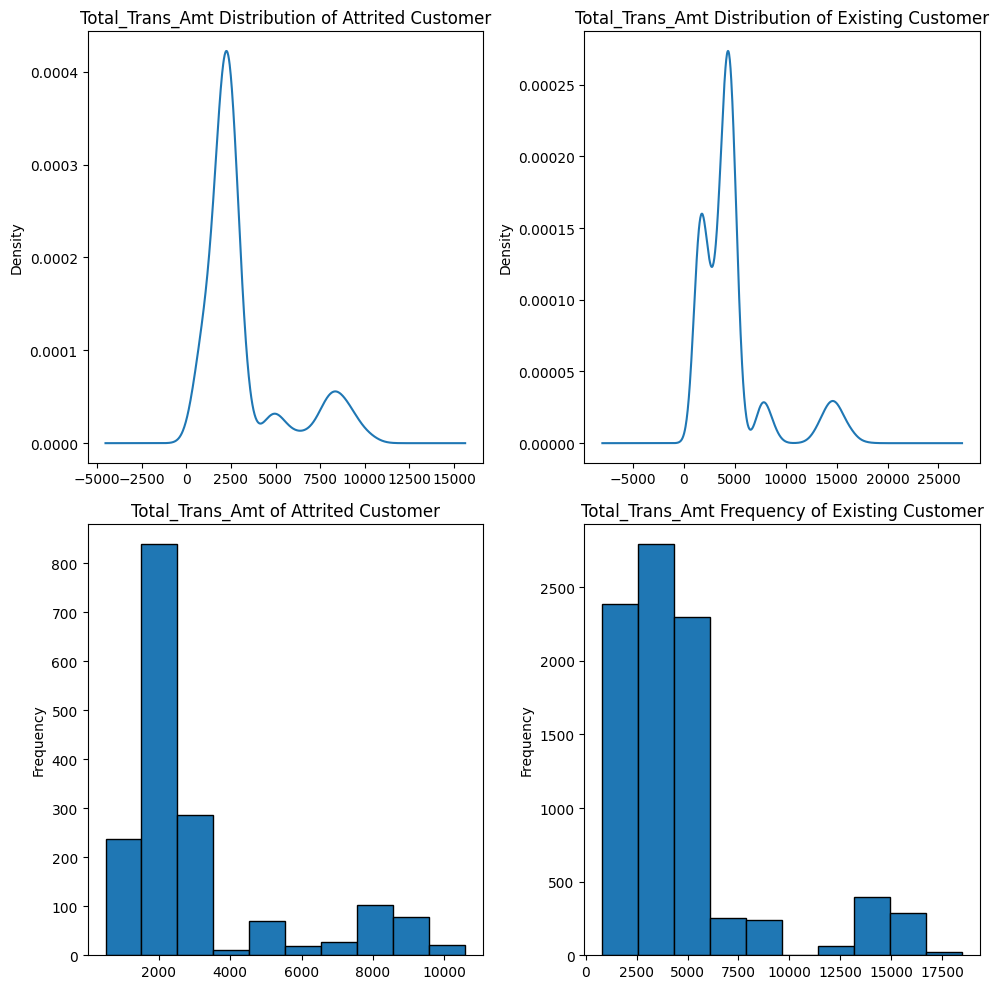

In [58]:


fig, axes = plt.subplots(2, 2, figsize=(10, 10)) #

attrited_data['Total_Trans_Amt'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('Total_Trans_Amt Distribution of Attrited Customer')

existing_data['Total_Trans_Amt'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('Total_Trans_Amt Distribution of Existing Customer')

attrited_data['Total_Trans_Amt'].plot(kind='hist',ax=axes[1,0],edgecolor='black')
axes[1,0].set_title('Total_Trans_Amt of Attrited Customer')

existing_data['Total_Trans_Amt'].plot(kind='hist',ax=axes[1,1],edgecolor='black')
axes[1,1].set_title('Total_Trans_Amt Frequency of Existing Customer')

fig.tight_layout()

plt.show()

In [78]:
ratio_vals = ['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
numerical_low_vals = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

numerical_med_vals = ['Months_on_book', 'Total_Trans_Ct']
numerical_high_vals = ['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt']

<Figure size 12000x6000 with 0 Axes>

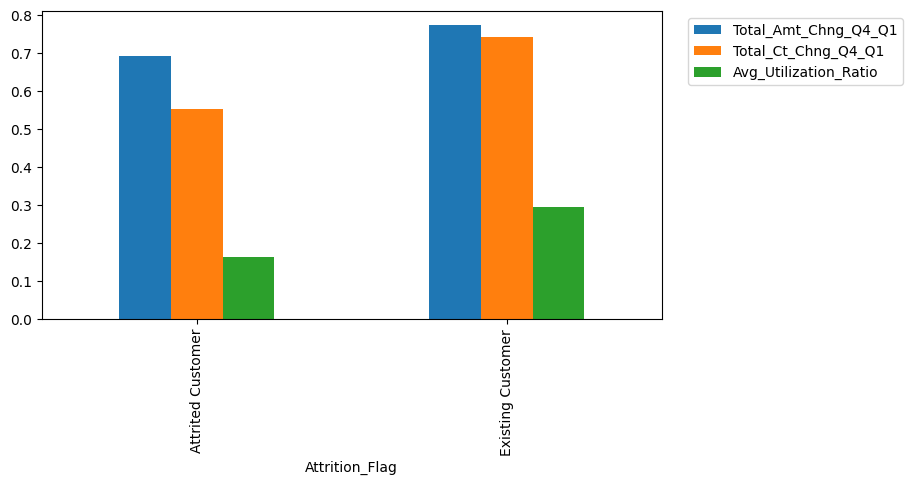

<Figure size 12000x6000 with 0 Axes>

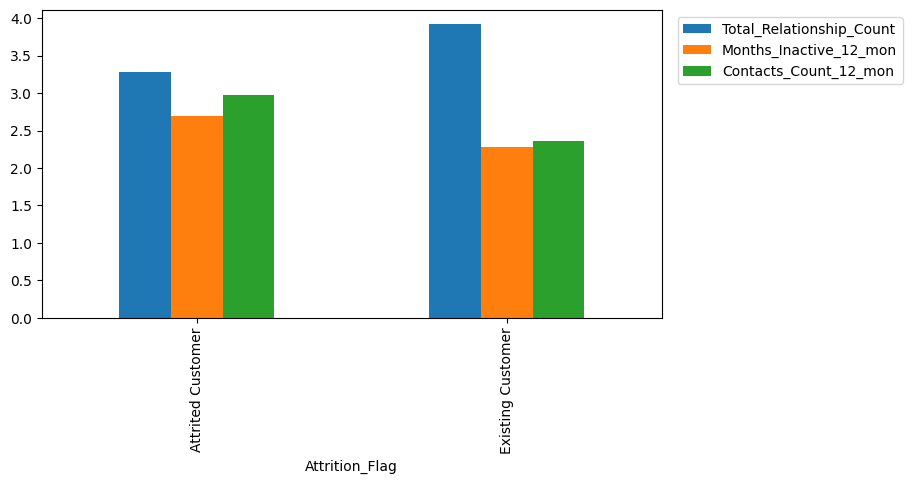

<Figure size 12000x6000 with 0 Axes>

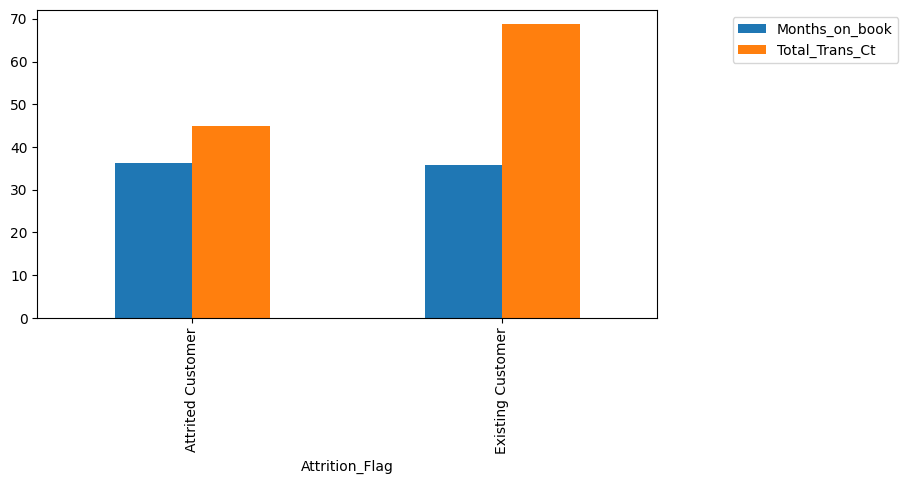

<Figure size 12000x6000 with 0 Axes>

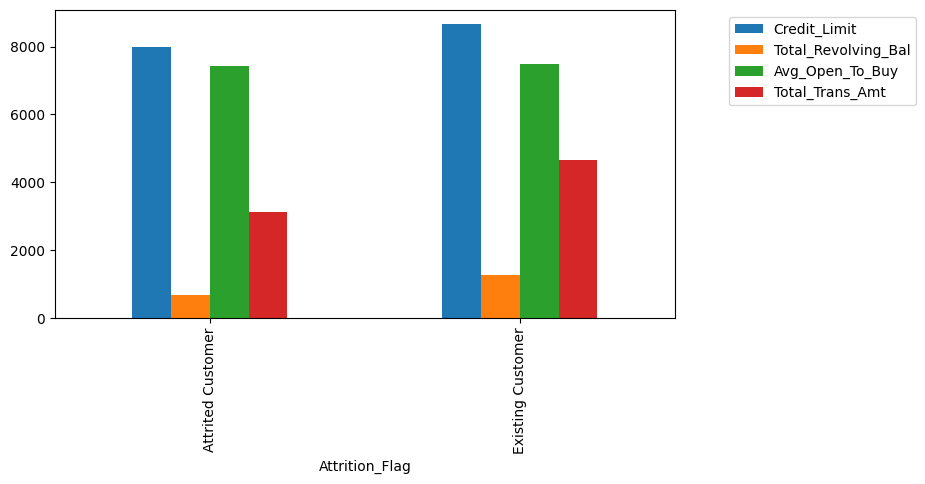

In [79]:
numeric_list = [ratio_vals,numerical_low_vals,numerical_med_vals,numerical_high_vals]
for i in numeric_list:
    plt.figure(figsize=(120,60))
    (df.groupby(["Attrition_Flag"])[i].mean()).plot(kind="bar", figsize=(8, 4), stacked=False)
    plt.legend( bbox_to_anchor=(1.4, 1),loc="best")

# Understanding Segment prone to attrition (Demographic)

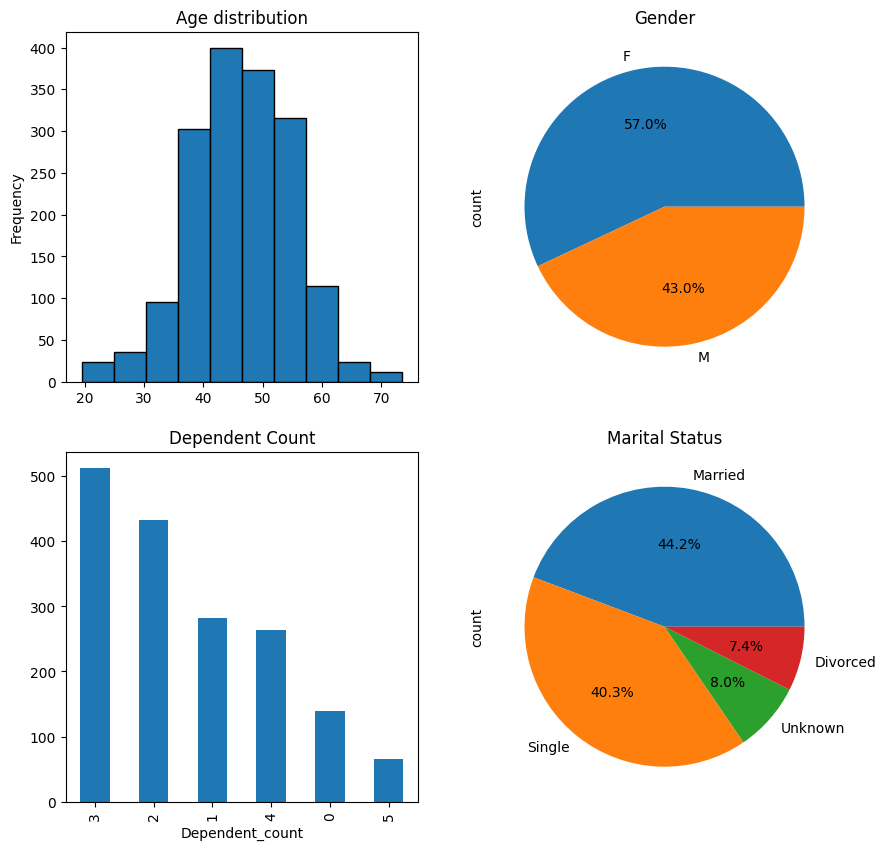

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0,0].set_title('Age distribution')
attrited_data['Age'].plot(kind='hist',ax=axes[0,0],edgecolor='black')

axes[0,1].set_title('Gender')
attrited_data['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%', ax=axes[0,1])

axes[1,0].set_title('Dependent Count')
attrited_data['Dependent_count'].value_counts().plot(kind='bar',ax=axes[1,0])

axes[1,1].set_title('Marital Status')
attrited_data['Marital_Status'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[1,1])


plt.show()

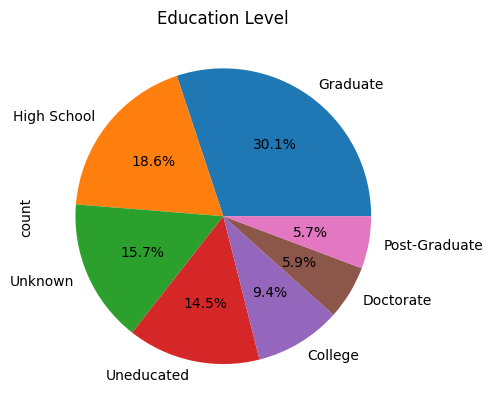

In [60]:
plt.title('Education Level')
attrited_data['Education_Level'].value_counts().plot(kind='pie',autopct='%1.1f%%')

plt.show()


# Returning Customers

In [61]:
existing_data.describe()

,Customer_Number,Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.731000e+03,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000
mean,3.739961e+09,46.058355,2.336159,35.874470,3.916046,2.274081,2.358035,8655.589280,1253.667507,7478.074585,0.772657,4650.811247,68.669454,0.742265,0.295701
std,3.690141e+07,8.674382,1.302495,8.014795,1.527505,1.016199,1.081172,9086.727894,759.235337,9095.237787,0.218313,3510.743522,22.924319,0.227413,0.272729
min,3.708092e+09,19.500000,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,3.713299e+09,40.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2578.000000,797.000000,1192.000000,0.643000,2387.500000,54.000000,0.617000,0.054000
50%,3.718327e+09,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4583.000000,1361.000000,3469.000000,0.743000,4098.000000,71.000000,0.721000,0.210000
75%,3.778150e+09,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11209.500000,1805.500000,9991.000000,0.859000,4778.500000,82.000000,0.833000,0.529000
max,3.828353e+09,73.500000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


In [87]:
returning_data = existing_data[(existing_data['Avg_Utilization_Ratio'] > existing_data['Avg_Utilization_Ratio'].mean()) & (existing_data['Total_Relationship_Count'] > existing_data['Total_Relationship_Count'].mean()) & (existing_data['Months_Inactive_12_mon'] < existing_data['Months_Inactive_12_mon'].mean()) & (existing_data['Total_Trans_Ct'] > existing_data['Total_Trans_Ct'].mean())]
returning_data

,Customer_Number,Attrition_Flag,Age,Date_of_birth,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
65,3708232683,Existing Customer,37.0,1987-08-23,F,2,Post-Graduate,Married,Less than $40K,Blue,...,2,3,2310.0,1513,797.0,0.682,4191,77,0.833,0.655
72,3708244683,Existing Customer,55.0,1969-02-21,F,2,College,Divorced,Less than $40K,Blue,...,2,1,2239.0,1340,899.0,0.658,4540,73,0.587,0.598
83,3708263583,Existing Customer,59.0,1965-03-14,F,1,Unknown,Single,Unknown,Blue,...,2,3,5528.0,1823,3705.0,0.731,4857,81,0.723,0.330
89,3708279708,Existing Customer,42.0,1982-04-16,F,3,Uneducated,Divorced,Less than $40K,Blue,...,2,4,2029.0,1377,652.0,0.838,4014,86,0.686,0.679
121,3708349083,Existing Customer,58.0,1966-02-23,F,1,Graduate,Single,Less than $40K,Blue,...,1,1,3173.0,1713,1460.0,0.609,3797,75,0.786,0.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,3825842058,Existing Customer,52.0,1972-08-03,F,3,High School,Married,Less than $40K,Blue,...,2,2,3136.0,1103,2033.0,0.812,4528,81,0.884,0.352
12006,3825866208,Existing Customer,39.0,1985-07-08,M,1,Post-Graduate,Single,$40K - $60K,Blue,...,1,1,2623.0,2121,502.0,0.722,4078,70,0.795,0.809
12035,3826490433,Existing Customer,53.0,1971-01-12,M,3,Graduate,Unknown,$80K - $120K,Blue,...,2,1,4778.0,1869,2909.0,0.743,5489,74,0.805,0.391
12099,3827722233,Existing Customer,42.0,1982-02-10,F,5,Graduate,Married,Less than $40K,Blue,...,1,2,2346.0,1373,973.0,0.730,4432,72,0.756,0.585


In [88]:
returning_data.describe()

,Customer_Number,Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,5.910000e+02,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,3.738702e+09,46.076142,2.394247,35.708968,4.994924,1.571912,2.360406,2754.940271,1564.468697,1215.339594,0.759222,4690.900169,79.622673,0.754973,0.591667
std,3.635172e+07,7.809227,1.298722,7.563510,0.824400,0.505384,1.067417,1116.085335,498.081018,914.044663,0.139006,1735.395034,8.256364,0.137574,0.162865
min,3.708233e+09,19.500000,0.000000,13.000000,4.000000,0.000000,0.000000,0.000000,491.000000,39.000000,0.421000,2330.000000,69.000000,0.449000,0.298000
25%,3.713440e+09,41.000000,1.000000,31.000000,4.000000,1.000000,2.000000,2035.000000,1178.000000,651.000000,0.666500,4166.500000,73.000000,0.654500,0.460500
50%,3.718446e+09,46.000000,2.000000,36.000000,5.000000,2.000000,2.000000,2568.000000,1548.000000,917.000000,0.743000,4512.000000,79.000000,0.750000,0.597000
75%,3.772034e+09,51.000000,3.000000,40.000000,6.000000,2.000000,3.000000,3157.000000,1911.500000,1396.500000,0.841500,4827.500000,84.000000,0.841000,0.710000
max,3.827981e+09,65.000000,5.000000,56.000000,6.000000,2.000000,5.000000,7685.000000,2517.000000,5235.000000,1.465000,17038.000000,130.000000,1.382000,0.983000


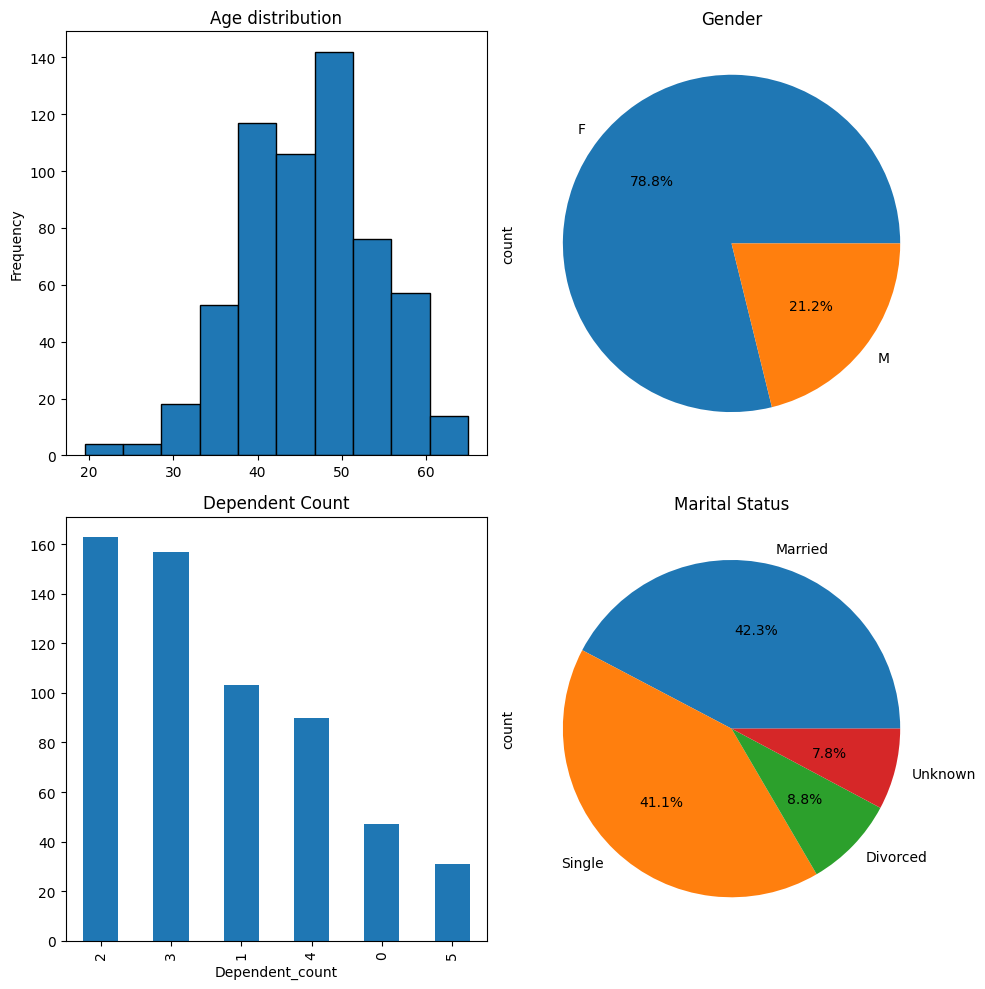

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0,0].set_title('Age distribution')
returning_data['Age'].plot(kind='hist',ax=axes[0,0],edgecolor='black')

axes[0,1].set_title('Gender')
returning_data['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%', ax=axes[0,1])

axes[1,0].set_title('Dependent Count')
returning_data['Dependent_count'].value_counts().plot(kind='bar',ax=axes[1,0])

axes[1,1].set_title('Marital Status')
returning_data['Marital_Status'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[1,1])

fig.tight_layout()
plt.show()

<Axes: ylabel='count'>

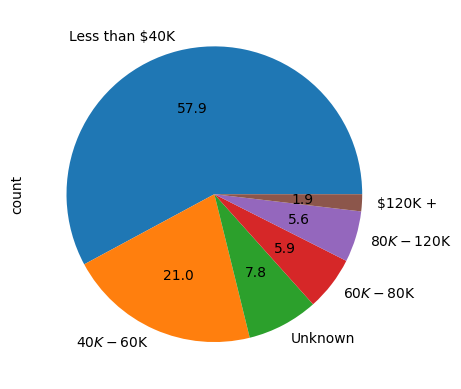

In [91]:
returning_data['Income_Category'].value_counts().plot(kind='pie',autopct='%1.1f')

<Axes: xlabel='Card_Category'>

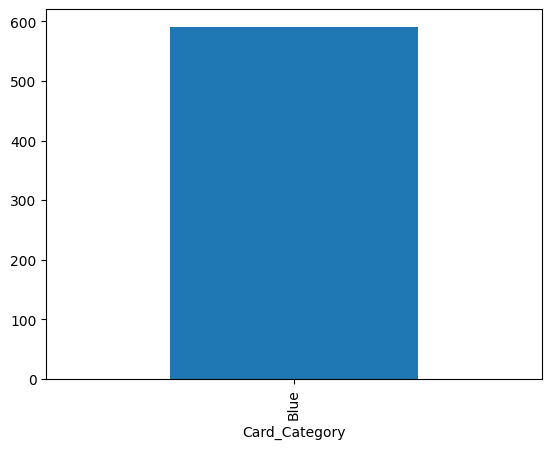

In [93]:
returning_data['Card_Category'].value_counts().plot(kind='bar')